In [2]:
#Loading libraries
import numpy as np 
import pandas as pd 
from scipy.io import arff
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pyswarms as ps
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading File
df = pd.read_csv('Zieni_Dataset for phishing detection.csv')
df

num_dots_url  num_hyph_url  num_underline_url  num_slash_url  \
0                1             0                  0              1   
1                2             1                  0              1   
2                1             0                  0              1   
3                5             1                  0              2   
4                2             0                  0              1   
...            ...           ...                ...            ...   
9995             2             0                  0              1   
9996             1             0                  0              4   
9997             2             0                  0              1   
9998             2             0                  0              0   
9999             3             1                  0              3   

      num_questionmark_url  num_equal_url  at_sign_url  num_and_url  \
0                        0              0            0            0   
1                        0              0            0            0   
2                        0              0            0            0   
3                        0              0            0            0   
4                        0              0            0            0   
...                    ...            ...          ...          ...   
9995                     0              0            0            0   
9996                     0              0            0            0   
9997                     0              0            0            0   
9998                     0              0            0            0   
9999                     0              0            0            0   

      num_exclamation_url  num_space_url  ...  tilde_param  num_comma_param  \
0                       0              0  ...            0                0   
1                       0              0  ...            0                0   
2                       0              0  ...            0                0   
3                       0              0  ...            0                0   
4                       0              0  ...            0                0   
...                   ...            ...  ...          ...              ...   
9995                    0              0  ...            0                0   
9996                    0              0  ...            0                0   
9997                    0              0  ...            0                0   
9998                    0              0  ...            0                0   
9999                    0              0  ...            0                0   

      num_plus_param  num_asterisk_param  num_dollar_param  num_percent_param  \
0                  0                   0                 0                  0   
1                  0                   0                 0                  0   
2                  0                   0                 0                  0   
3                  0                   0                 0                  0   
4                  0                   0                 0                  0   
...              ...                 ...               ...                ...   
9995               0                   0                 0                  0   
9996               0                   0                 0                  0   
9997               0                   0                 0                  0   
9998               0                   0                 0                  0   
9999               0                   0                 0                  0   

      length_param  tld_in_param  num_param  phishing  
0                0             0          0         0  
1                0             0          0         1  
2                0             0          0         1  
3                0             0          0         1  
4                0             0          0         0  
...            ...           ...        ...       ... 

In [4]:
df.shape

(10000, 75)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   num_dots_url            10000 non-null  int64
 1   num_hyph_url            10000 non-null  int64
 2   num_underline_url       10000 non-null  int64
 3   num_slash_url           10000 non-null  int64
 4   num_questionmark_url    10000 non-null  int64
 5   num_equal_url           10000 non-null  int64
 6   at_sign_url             10000 non-null  int64
 7   num_and_url             10000 non-null  int64
 8   num_exclamation_url     10000 non-null  int64
 9   num_space_url           10000 non-null  int64
 10  tilde_url               10000 non-null  int64
 11  num_comma_url           10000 non-null  int64
 12  num_plus_url            10000 non-null  int64
 13  num_asterisk_url        10000 non-null  int64
 14  hashtag_url             10000 non-null  int64
 15  num_dollar_url      

In [6]:
df.describe()

num_dots_url  num_hyph_url  num_underline_url  num_slash_url  \
count  10000.000000  10000.000000        10000.00000   10000.000000   
mean       2.285000      0.635200            0.20960       1.906400   
std        1.595816      1.808383            1.03217       2.112791   
min        1.000000      0.000000            0.00000       0.000000   
25%        1.000000      0.000000            0.00000       1.000000   
50%        2.000000      0.000000            0.00000       1.000000   
75%        3.000000      1.000000            0.00000       2.000000   
max       22.000000     25.000000           24.00000      49.000000   

       num_questionmark_url  num_equal_url   at_sign_url   num_and_url  \
count          10000.000000   10000.000000  10000.000000  10000.000000   
mean               0.187700       0.421300      0.023000      0.234200   
std                0.429287       1.216205      0.151239      0.961583   
min                0.000000       0.000000      0.000000      0.000000   
25%                0.000000       0.000000      0.000000      0.000000   
50%                0.000000       0.000000      0.000000      0.000000   
75%                0.000000       0.000000      0.000000      0.000000   
max                4.000000      14.000000      2.000000     13.000000   

       num_exclamation_url  num_space_url  ...  tilde_param  num_comma_param  \
count         10000.000000   10000.000000  ...   10000.0000      10000.00000   
mean              0.003500       0.000900  ...       0.0004          0.00060   
std               0.088817       0.038721  ...       0.0400          0.04472   
min               0.000000       0.000000  ...       0.0000          0.00000   
25%               0.000000       0.000000  ...       0.0000          0.00000   
50%               0.000000       0.000000  ...       0.0000          0.00000   
75%               0.000000       0.000000  ...       0.0000          0.00000   
max               4.000000       3.000000  ...       4.0000          4.00000   

       num_plus_param  num_asterisk_param  num_dollar_param  \
count    10000.000000        10000.000000      10000.000000   
mean         0.002400            0.000500          0.000600   
std          0.100972            0.026454          0.031619   
min          0.000000            0.000000          0.000000   
25%          0.000000            0.000000          0.000000   
50%          0.000000            0.000000          0.000000   
75%          0.000000            0.000000          0.000000   
max          7.000000            2.000000          2.000000   

       num_percent_param  length_param  tld_in_param     num_param  \
count       10000.000000  10000.000000  10000.000000  10000.000000   
mean            0.235600     17.140600      0.070200      0.383100   
std             1.572177     60.429339      0.255497      1.131664   
min             0.000000      0.000000      0.000000      0.000000   
25%             0.000000      0.000000      0.000000      0.000000   
50%             0.000000      0.000000      0.000000      0.000000   
75%             0.000000      0.000000      0.000000      0.000000   
max            46.000000    865.000000      1.000000     14.000000   

           phishing  
count  10000.000000  
mean       0.500000  
std        0.500025  
min        0.000000  
25%        0.000000  
50%        0.500000  
75%        1.000000  
max        1.000000  

[8 rows x 75 columns]

In [7]:
pd.DataFrame(df.isnull().sum(), columns=["nbr missing  value  ech  colone"])

nbr missing  value  ech  colone
num_dots_url                                        0
num_hyph_url                                        0
num_underline_url                                   0
num_slash_url                                       0
num_questionmark_url                                0
...                                               ...
num_percent_param                                   0
length_param                                        0
tld_in_param                                        0
num_param                                           0
phishing                                            0

[75 rows x 1 columns]

In [8]:
df.dtypes

num_dots_url            int64
num_hyph_url            int64
num_underline_url       int64
num_slash_url           int64
num_questionmark_url    int64
                        ...  
num_percent_param       int64
length_param            int64
tld_in_param            int64
num_param               int64
phishing                int64
Length: 75, dtype: object

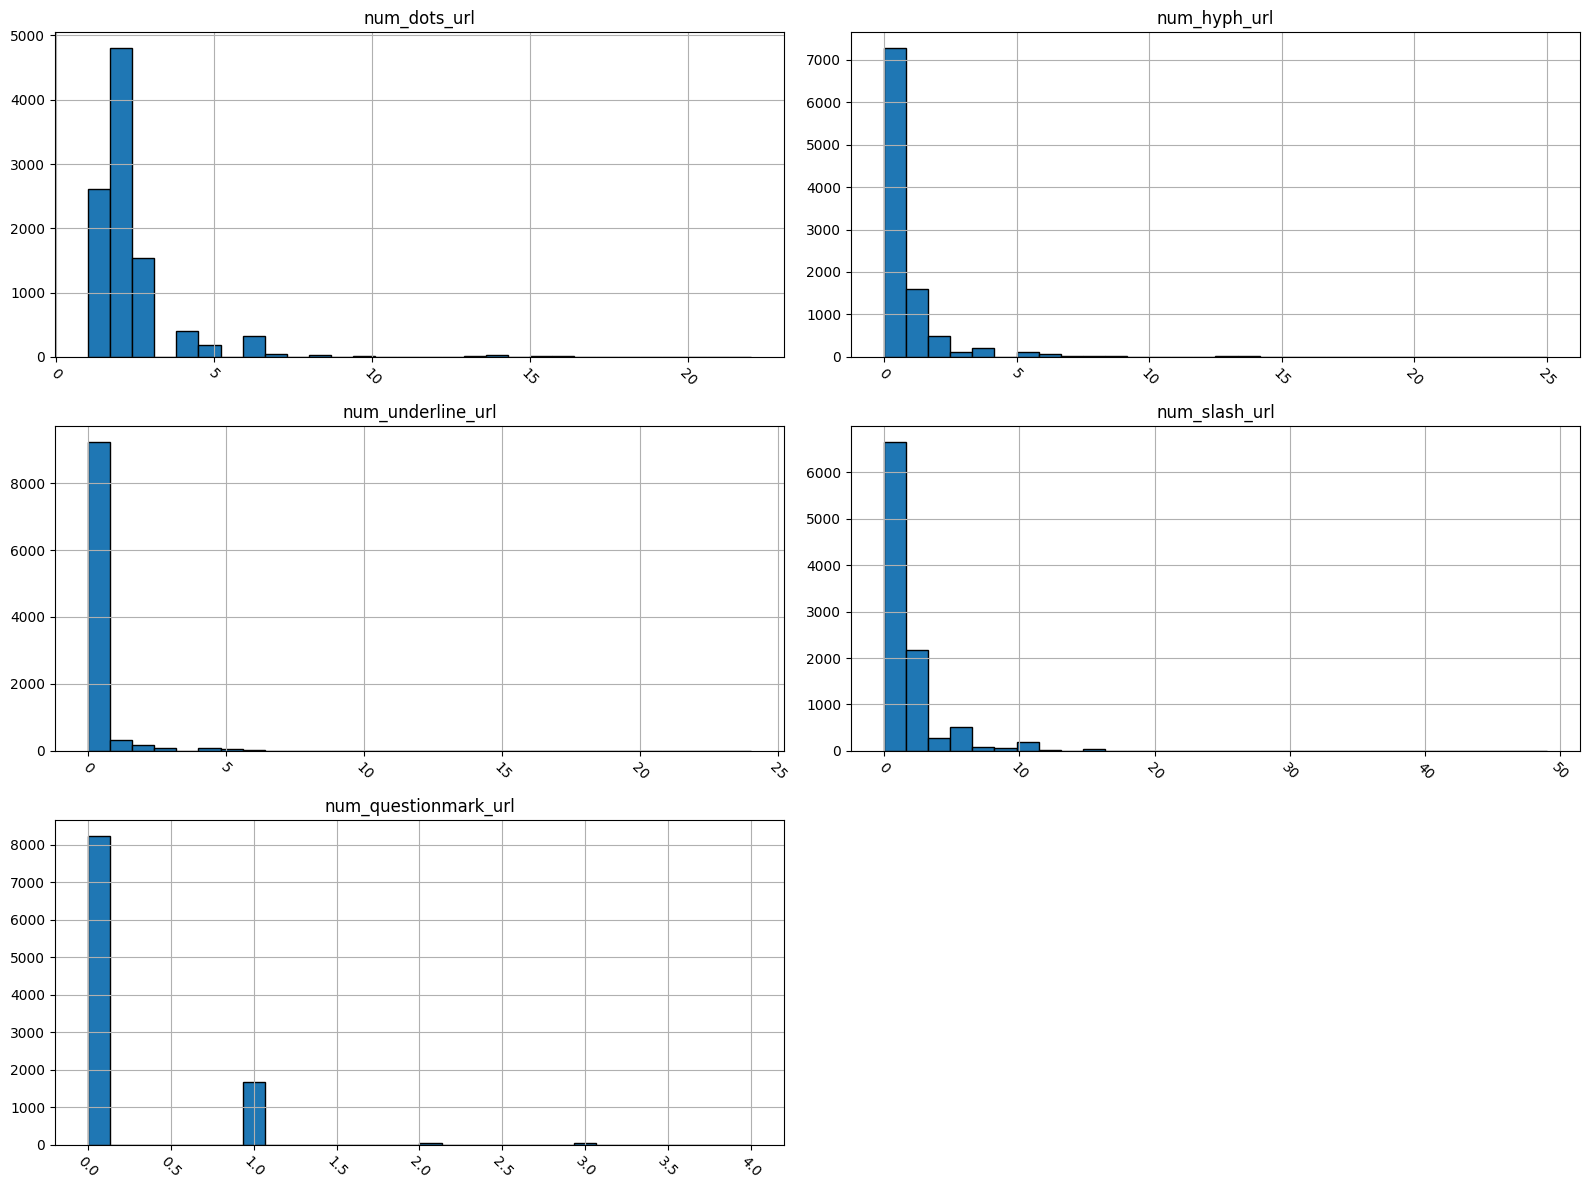

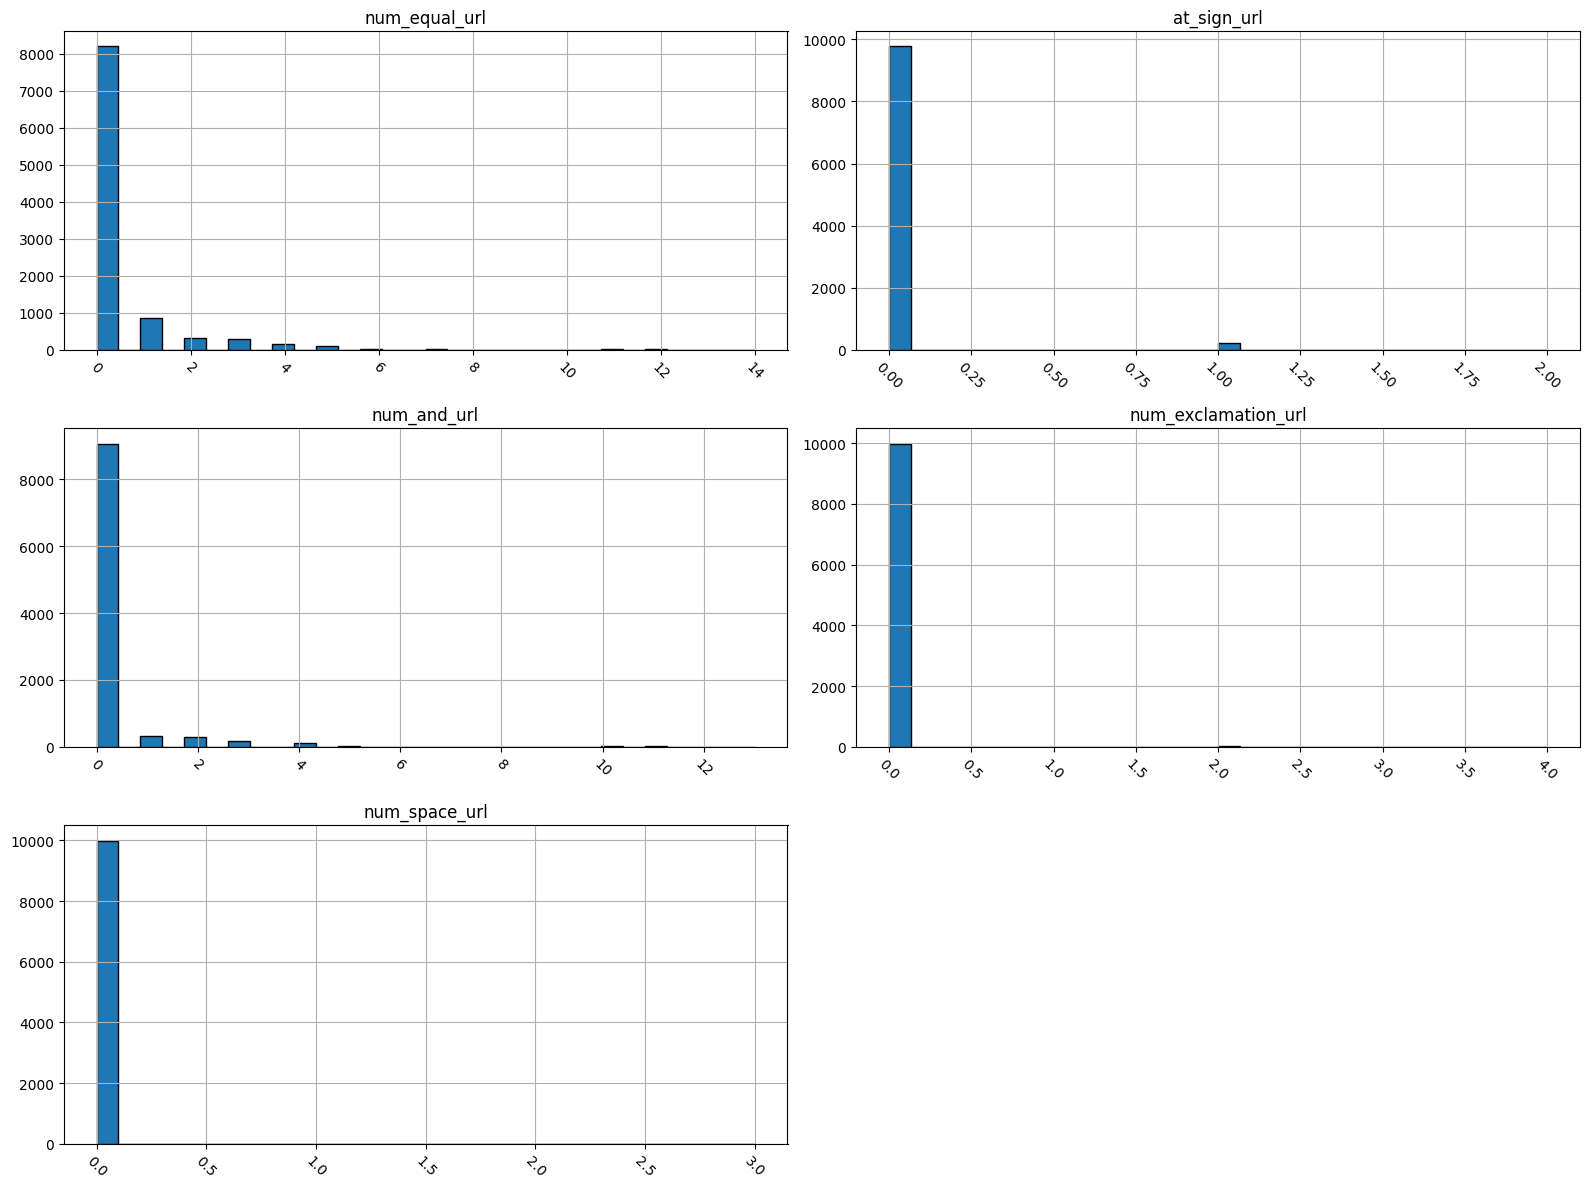

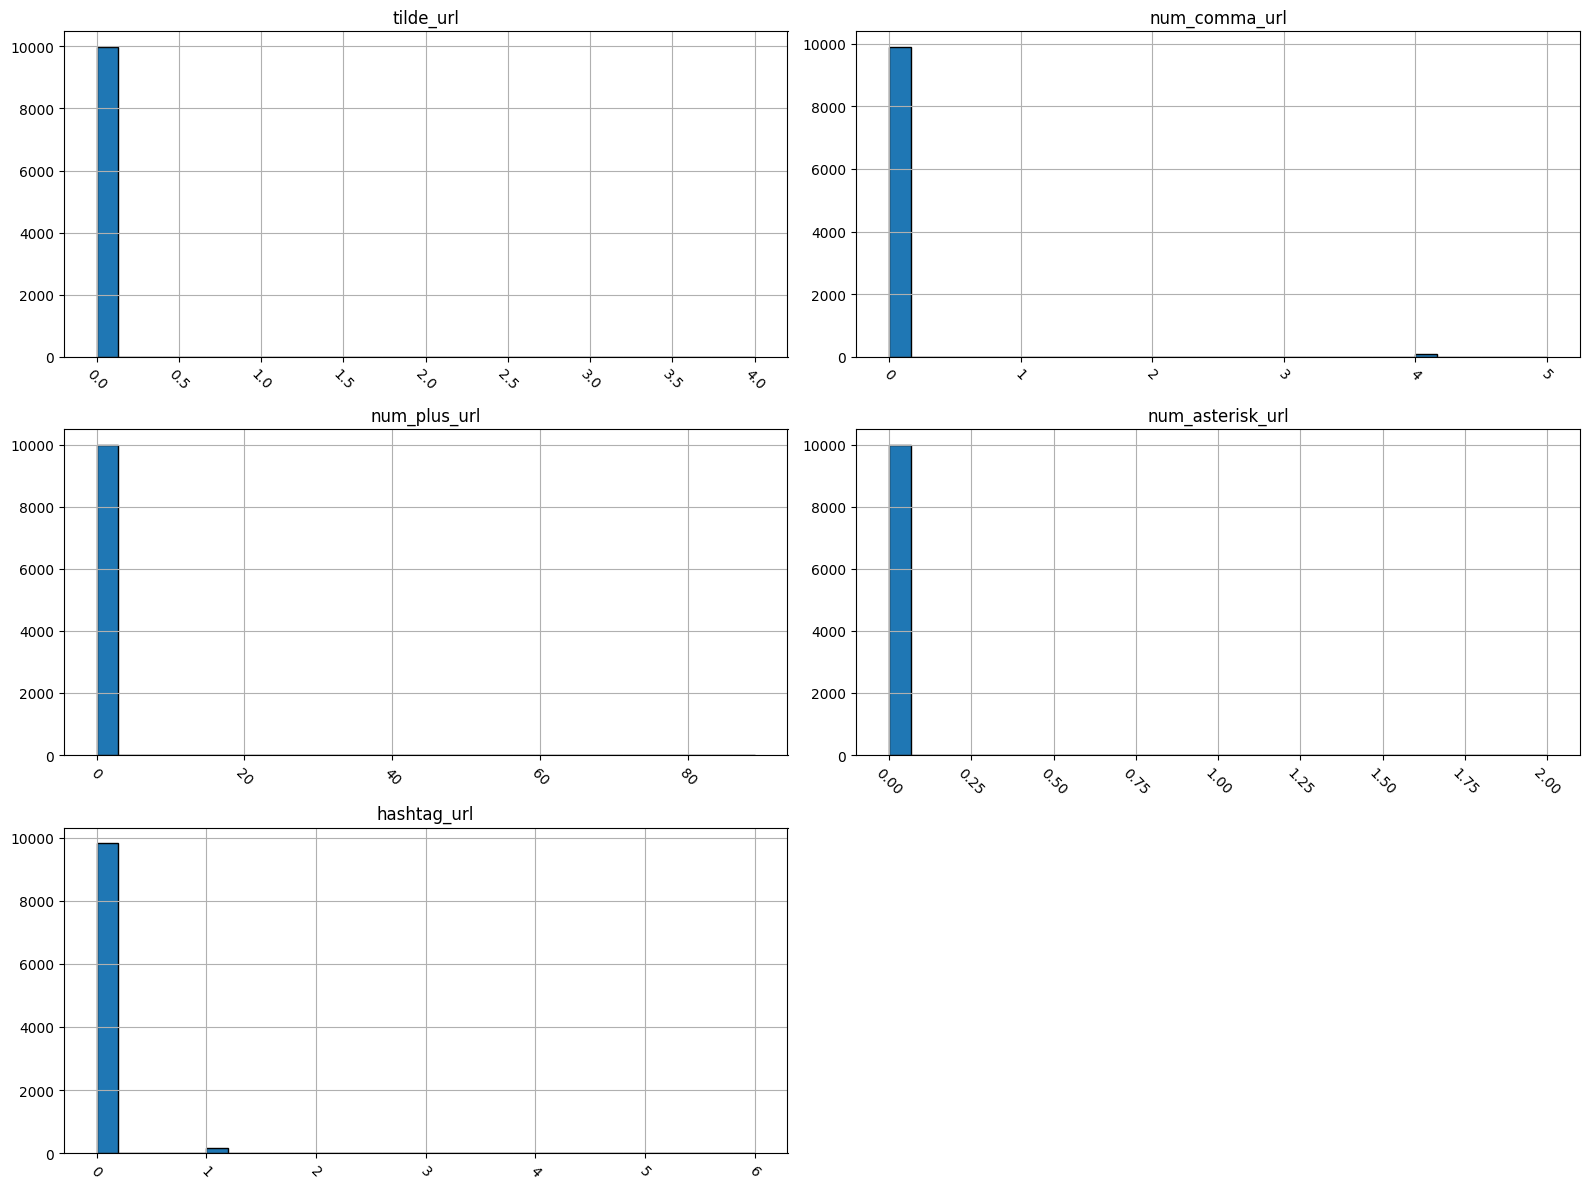

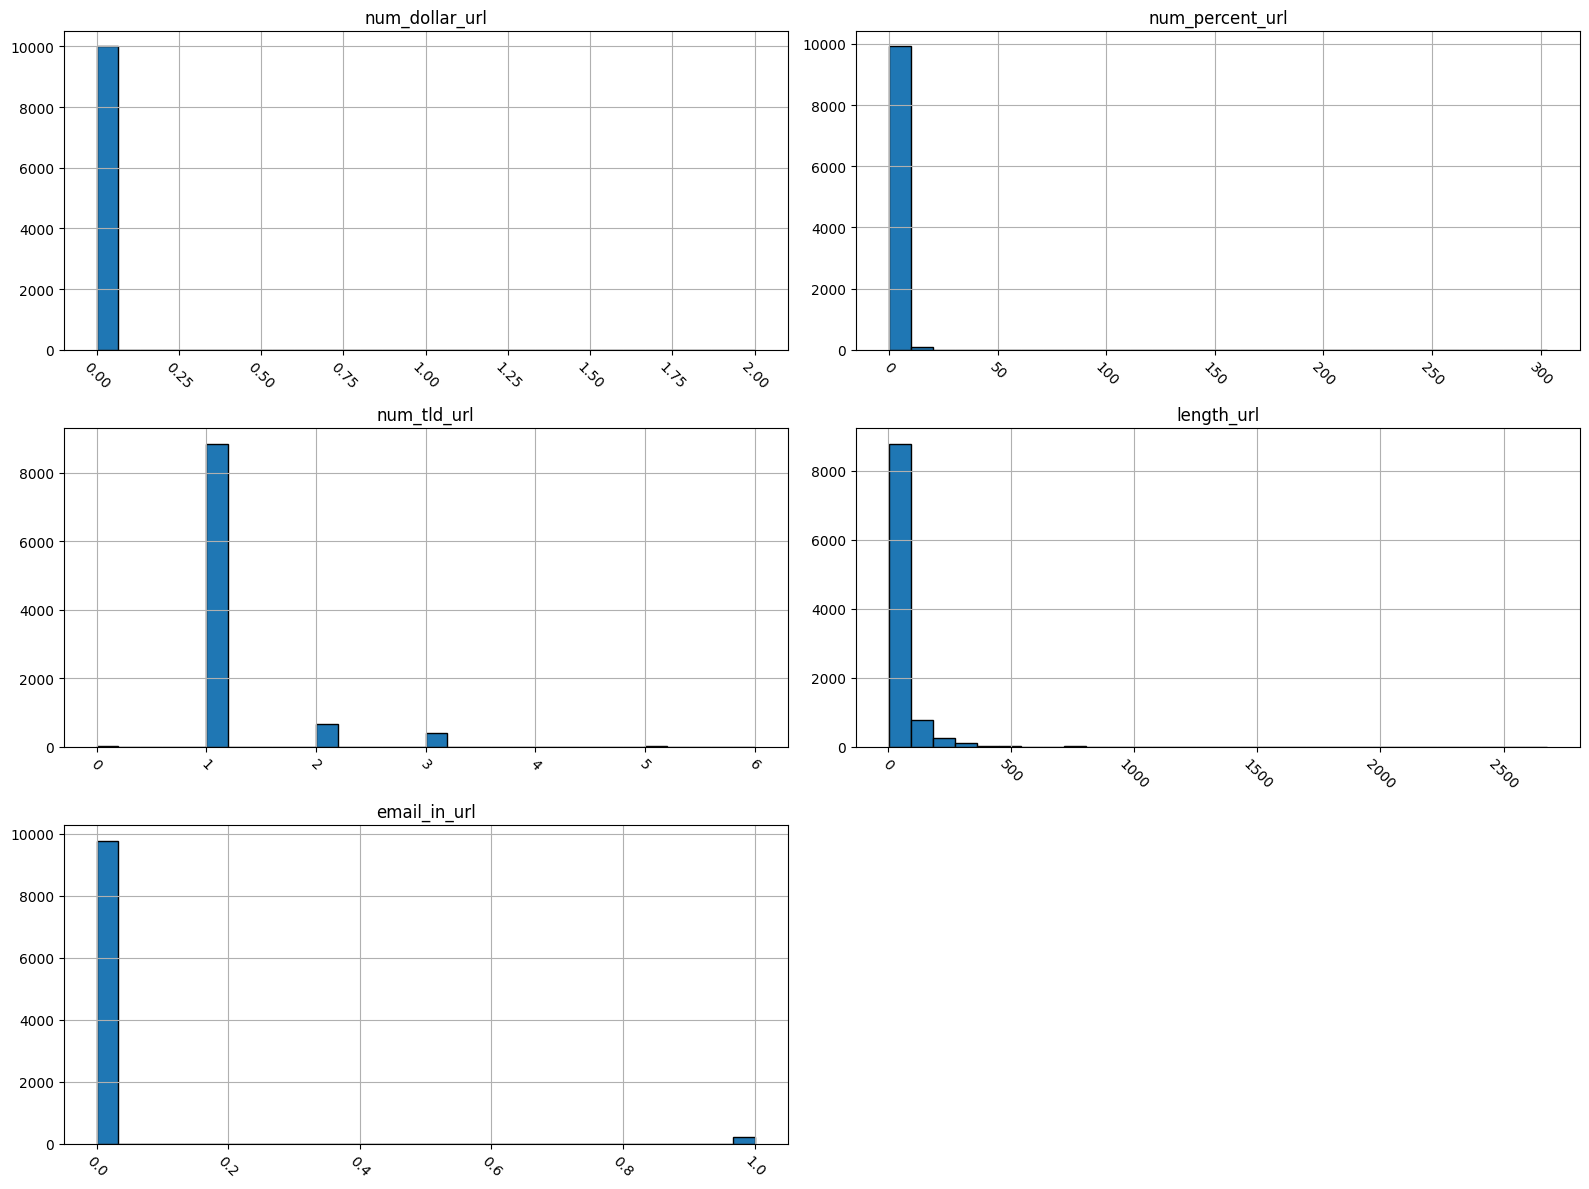

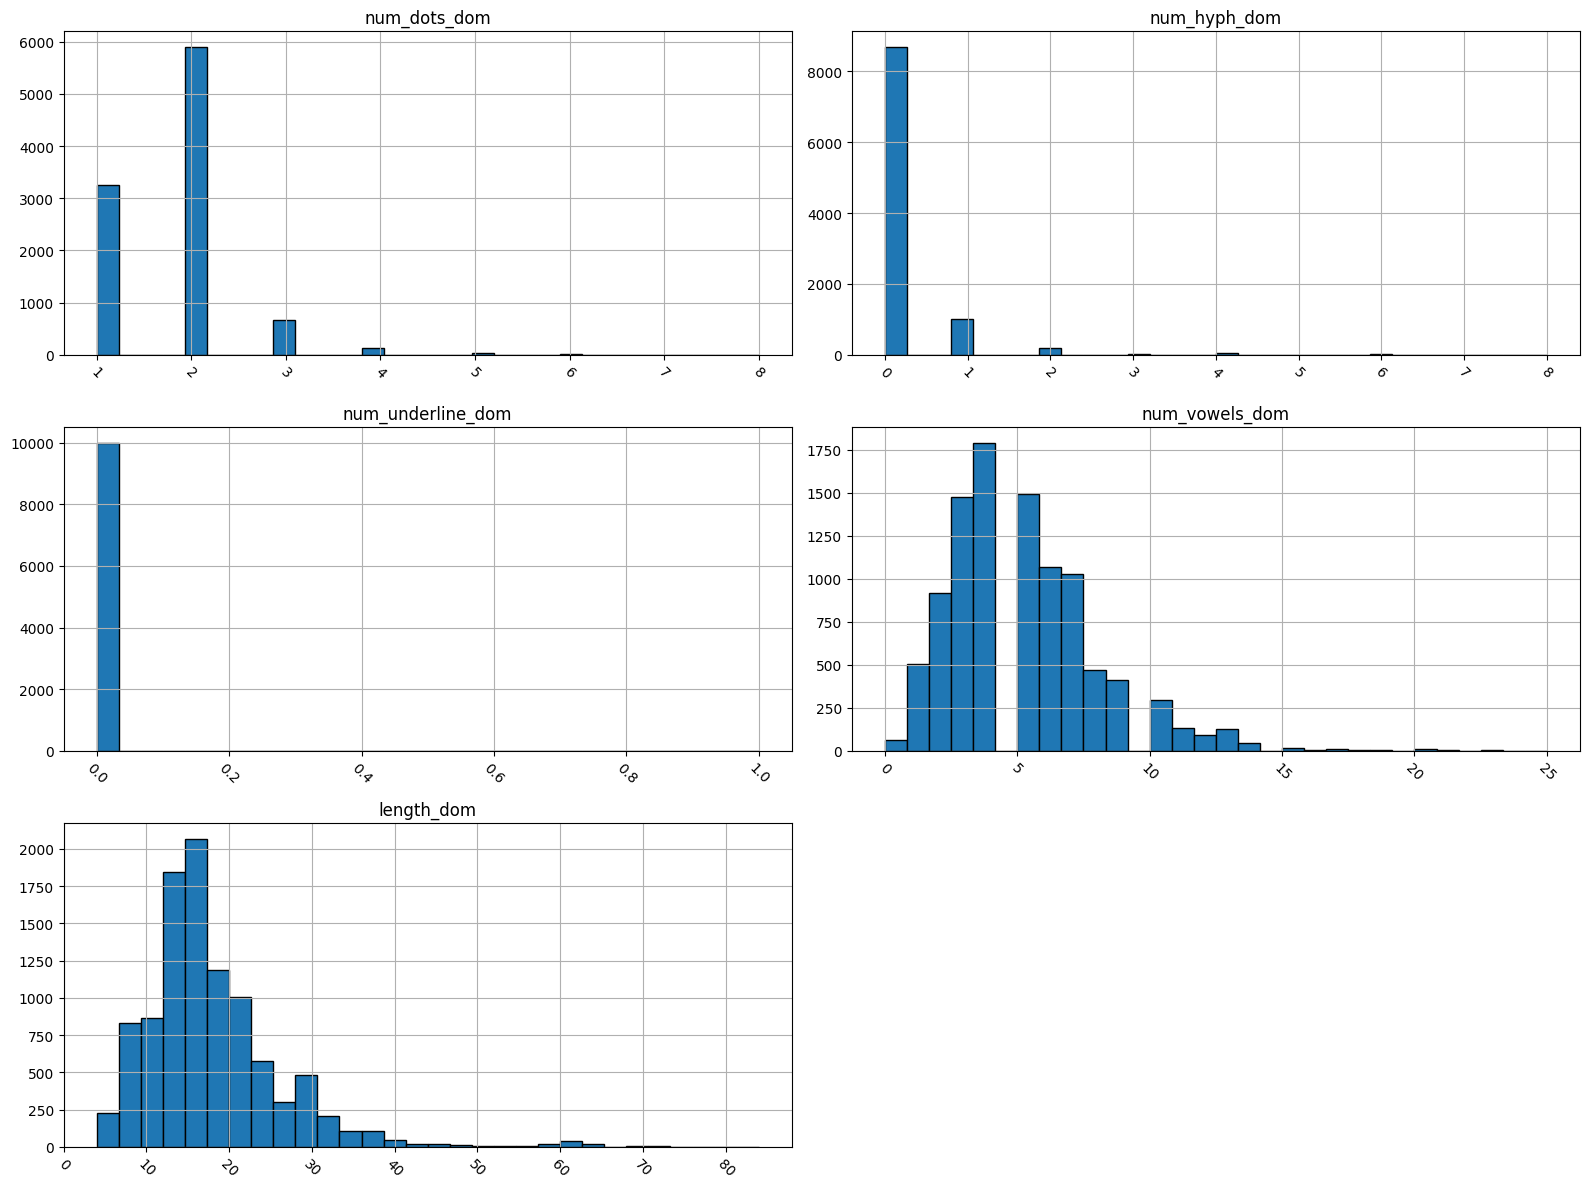

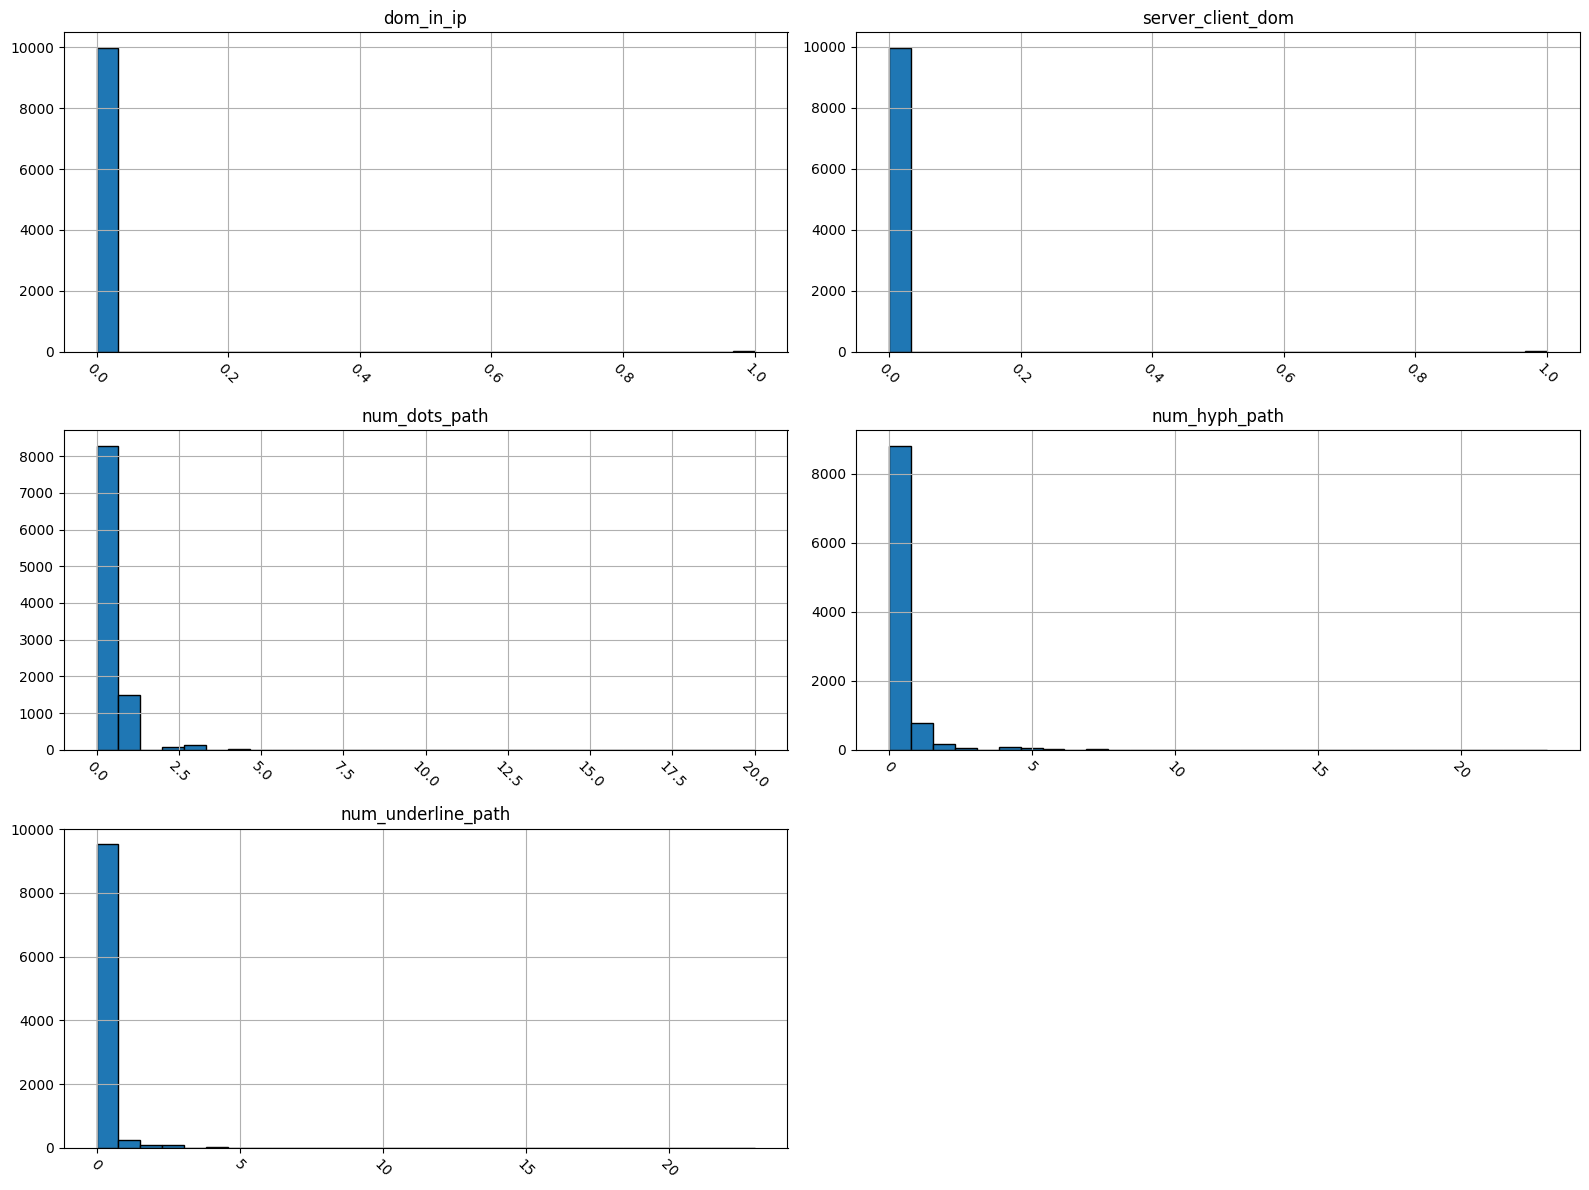

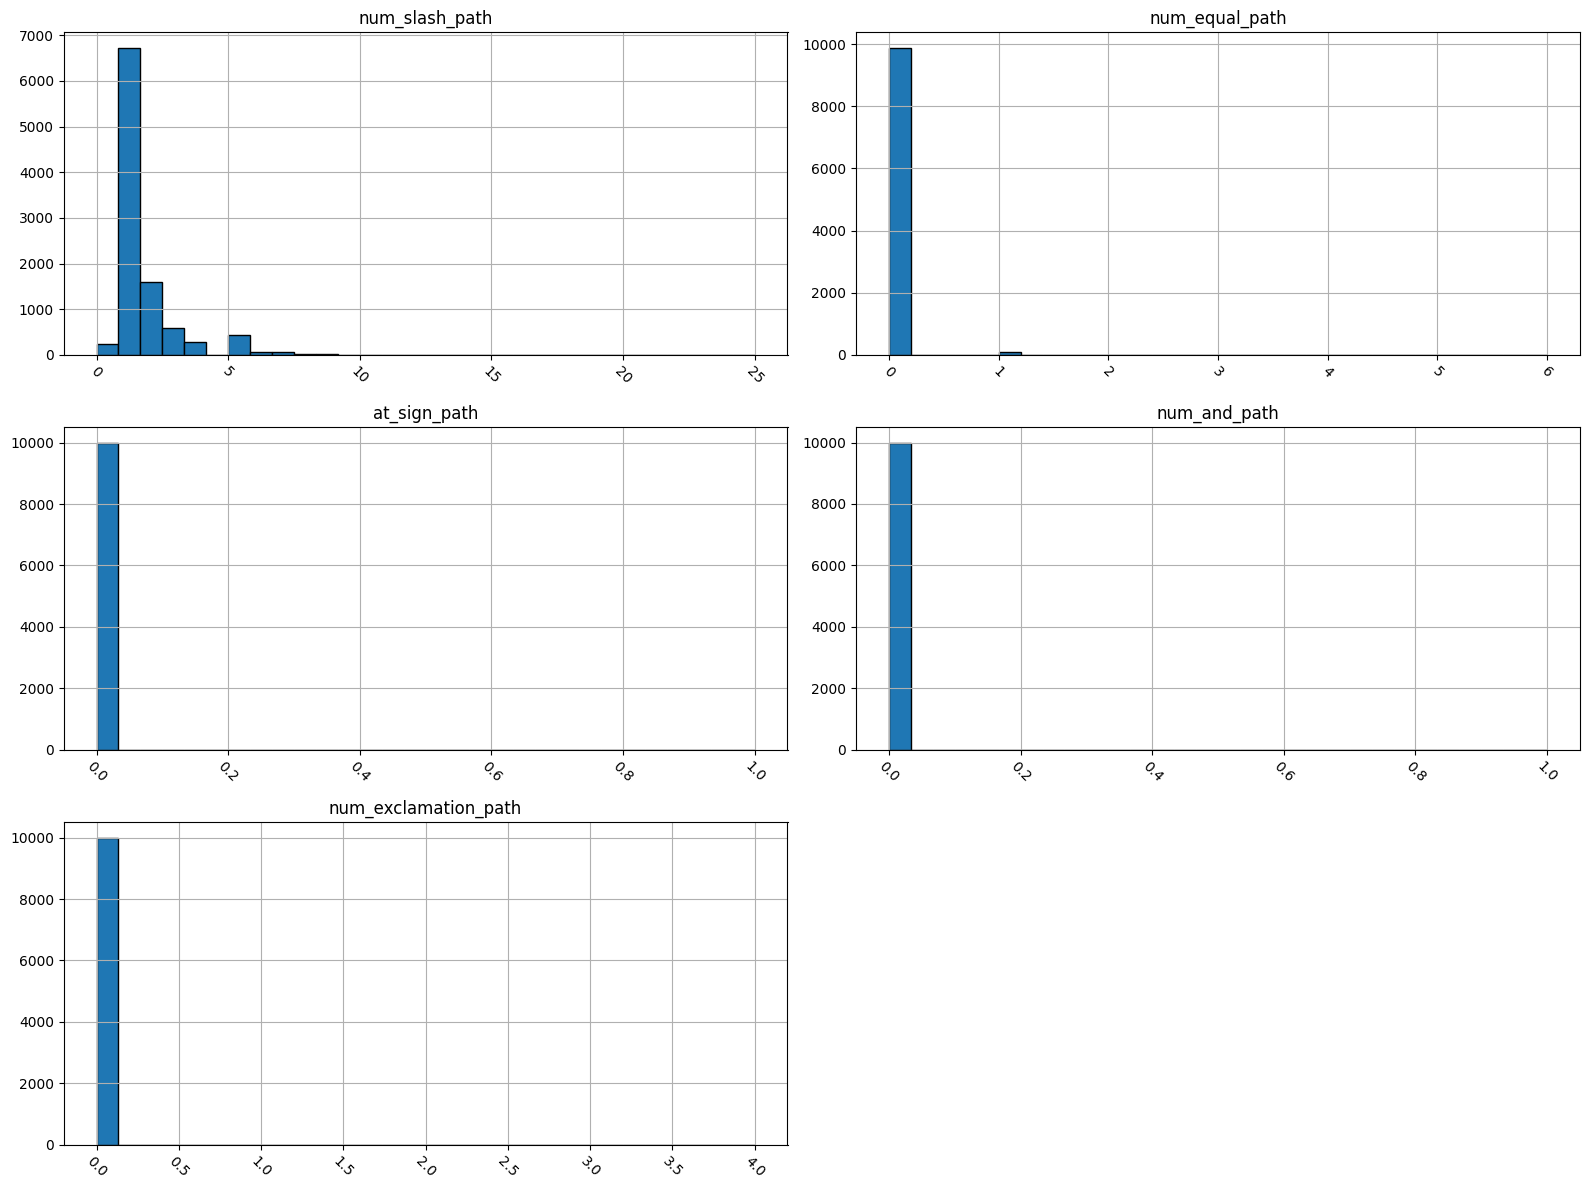

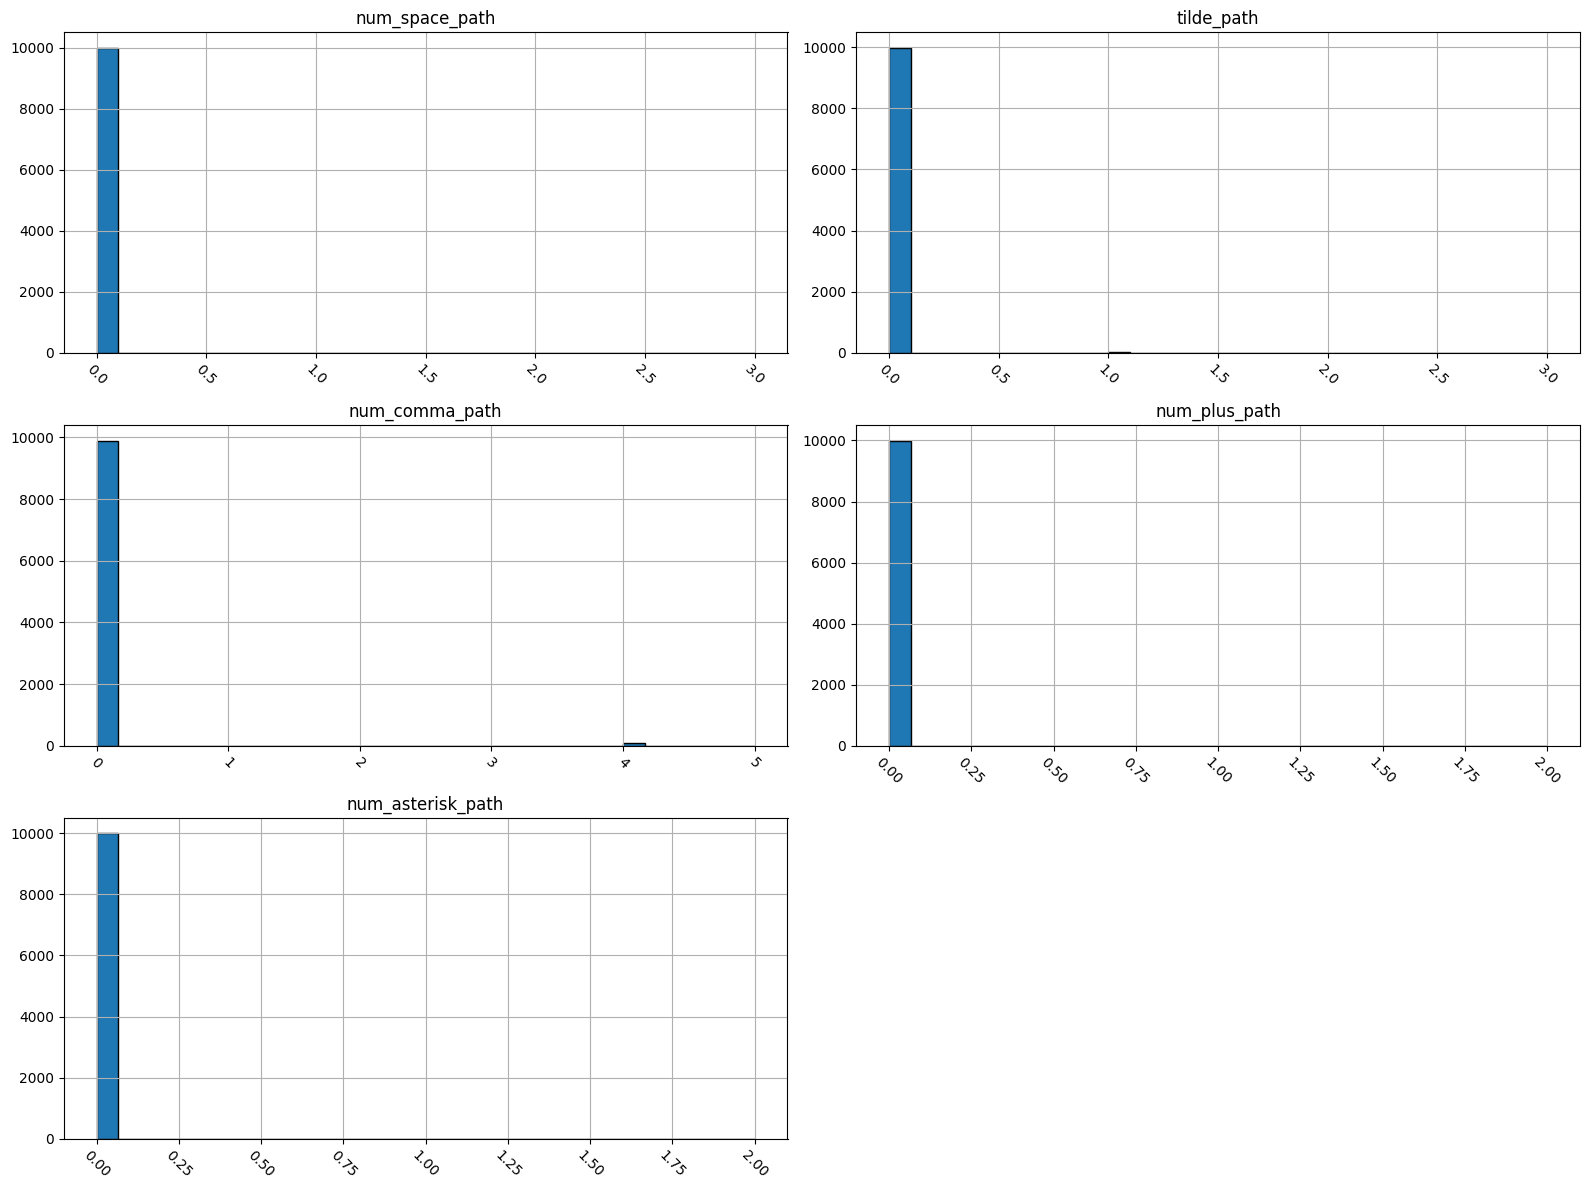

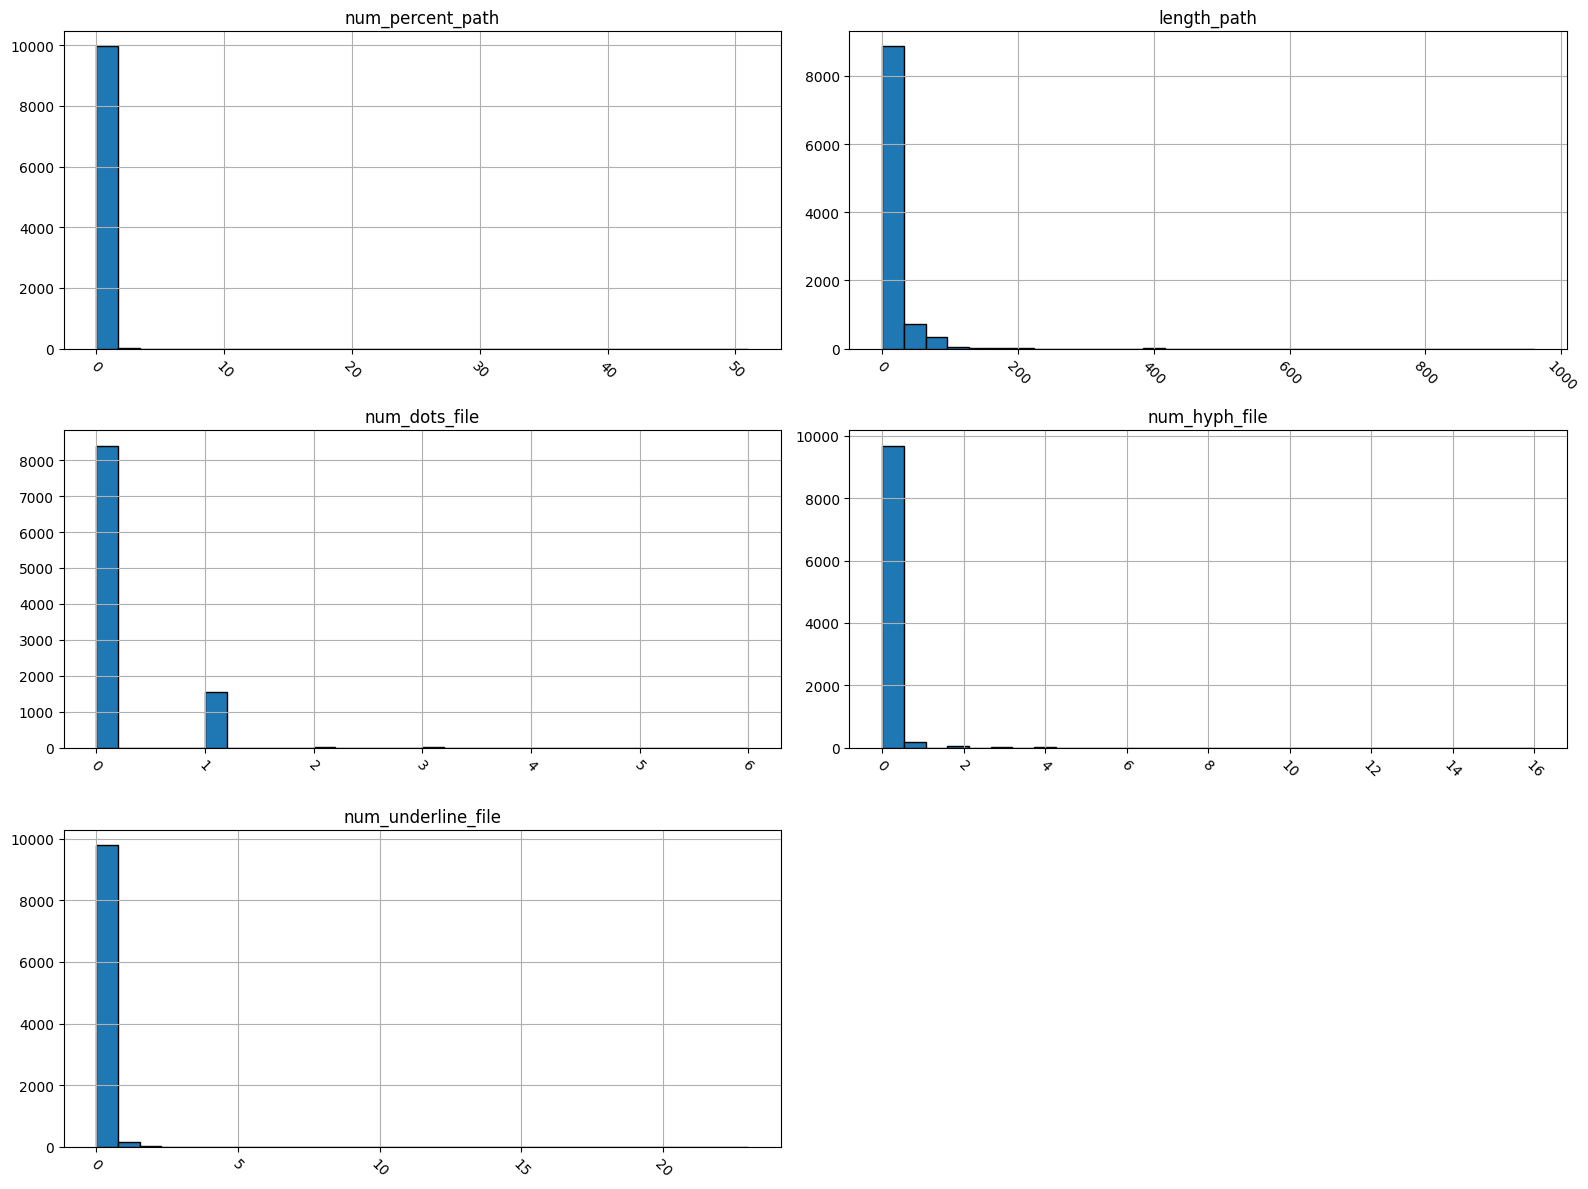

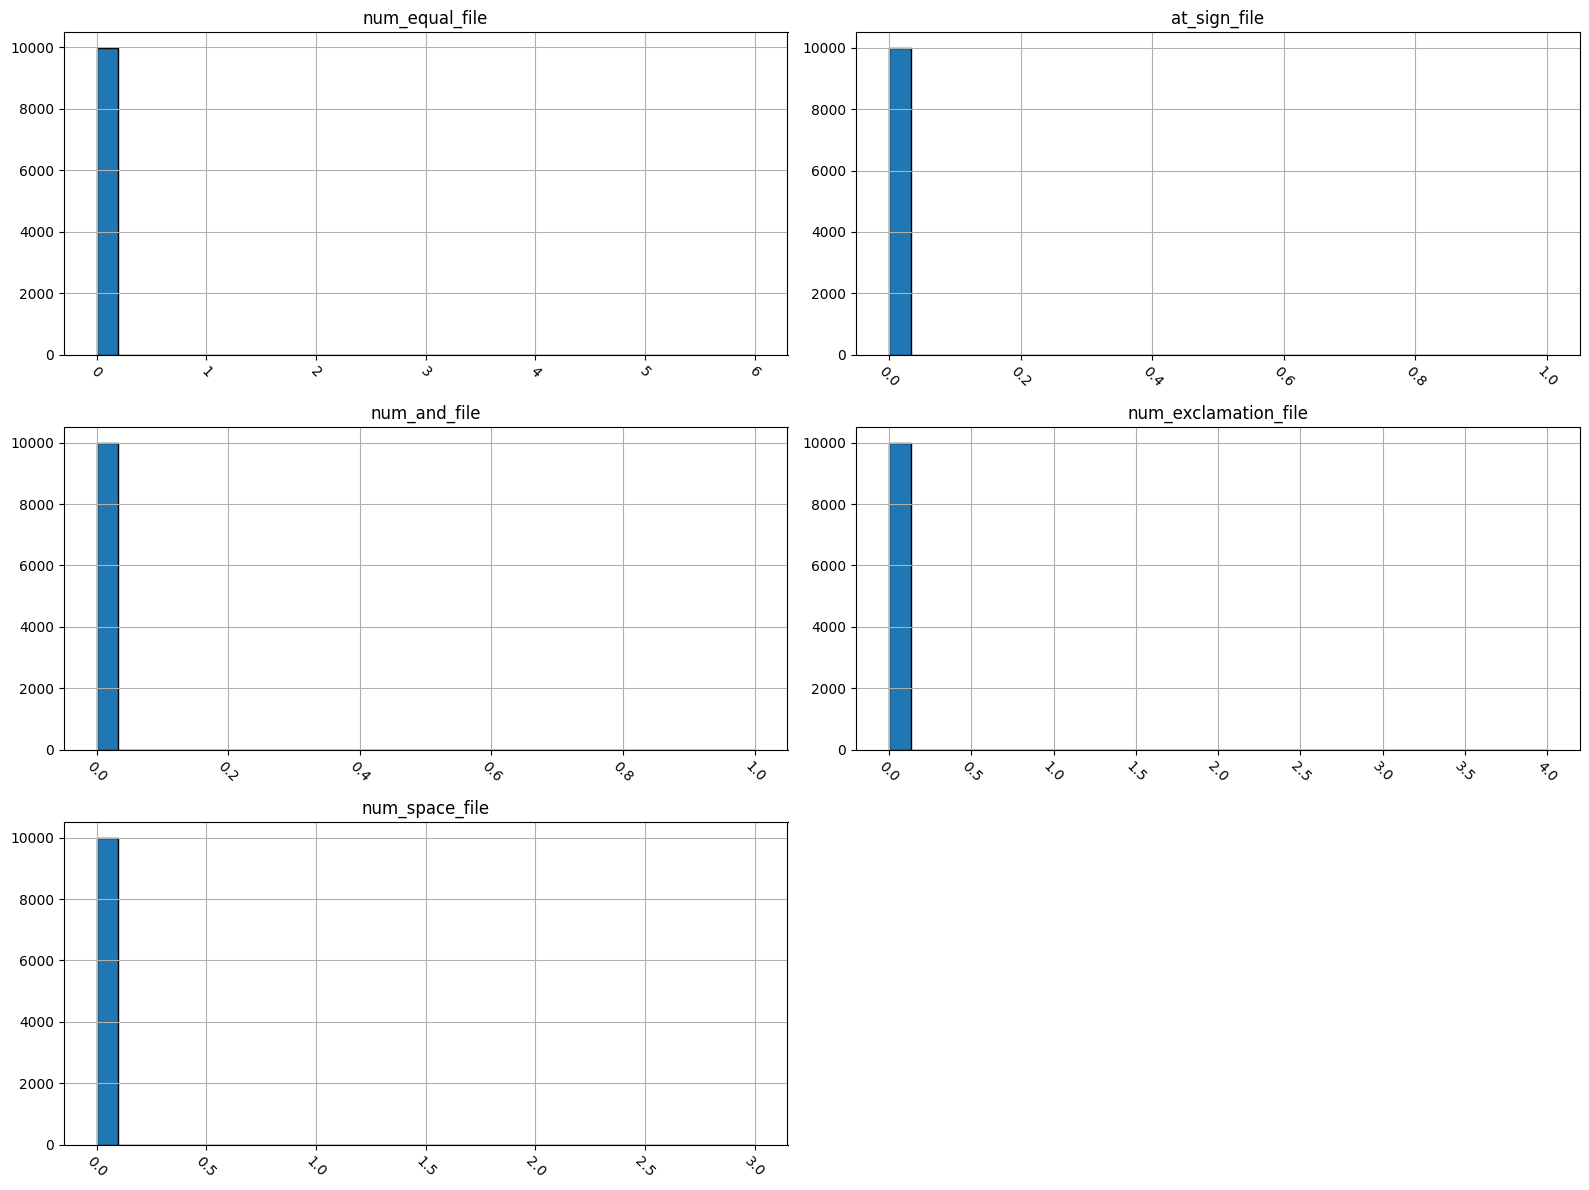

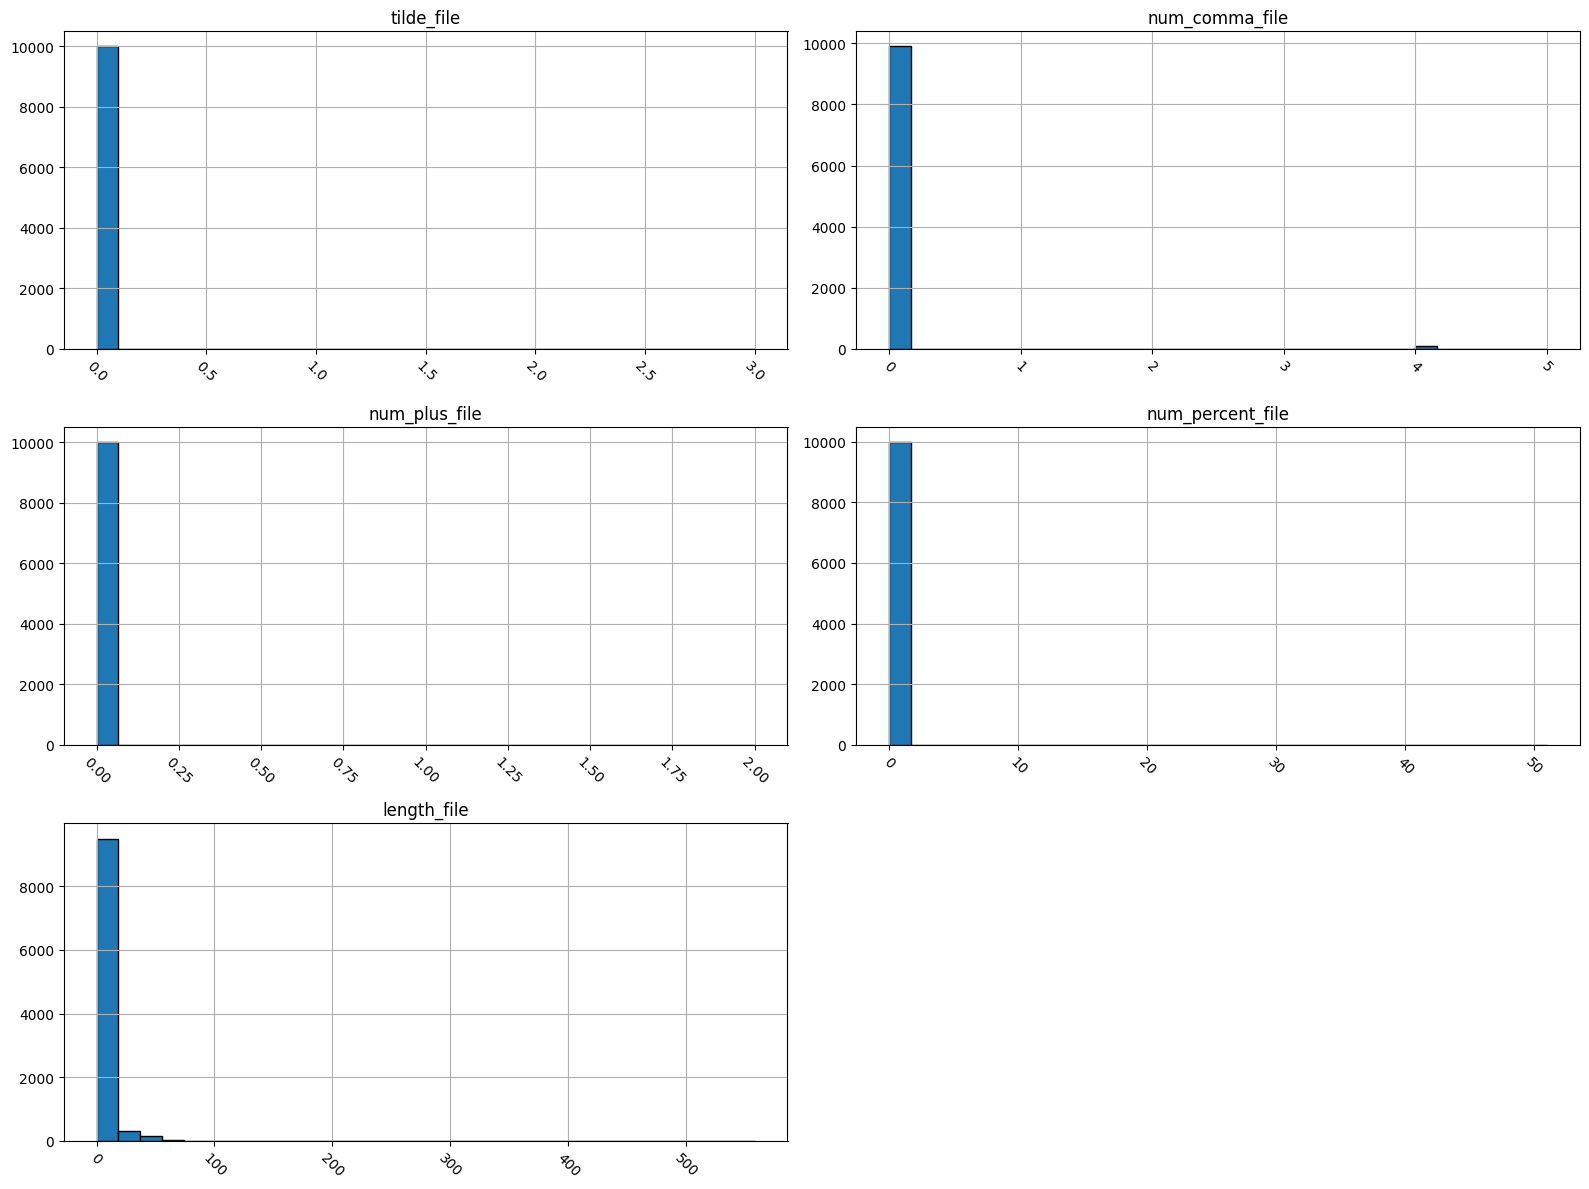

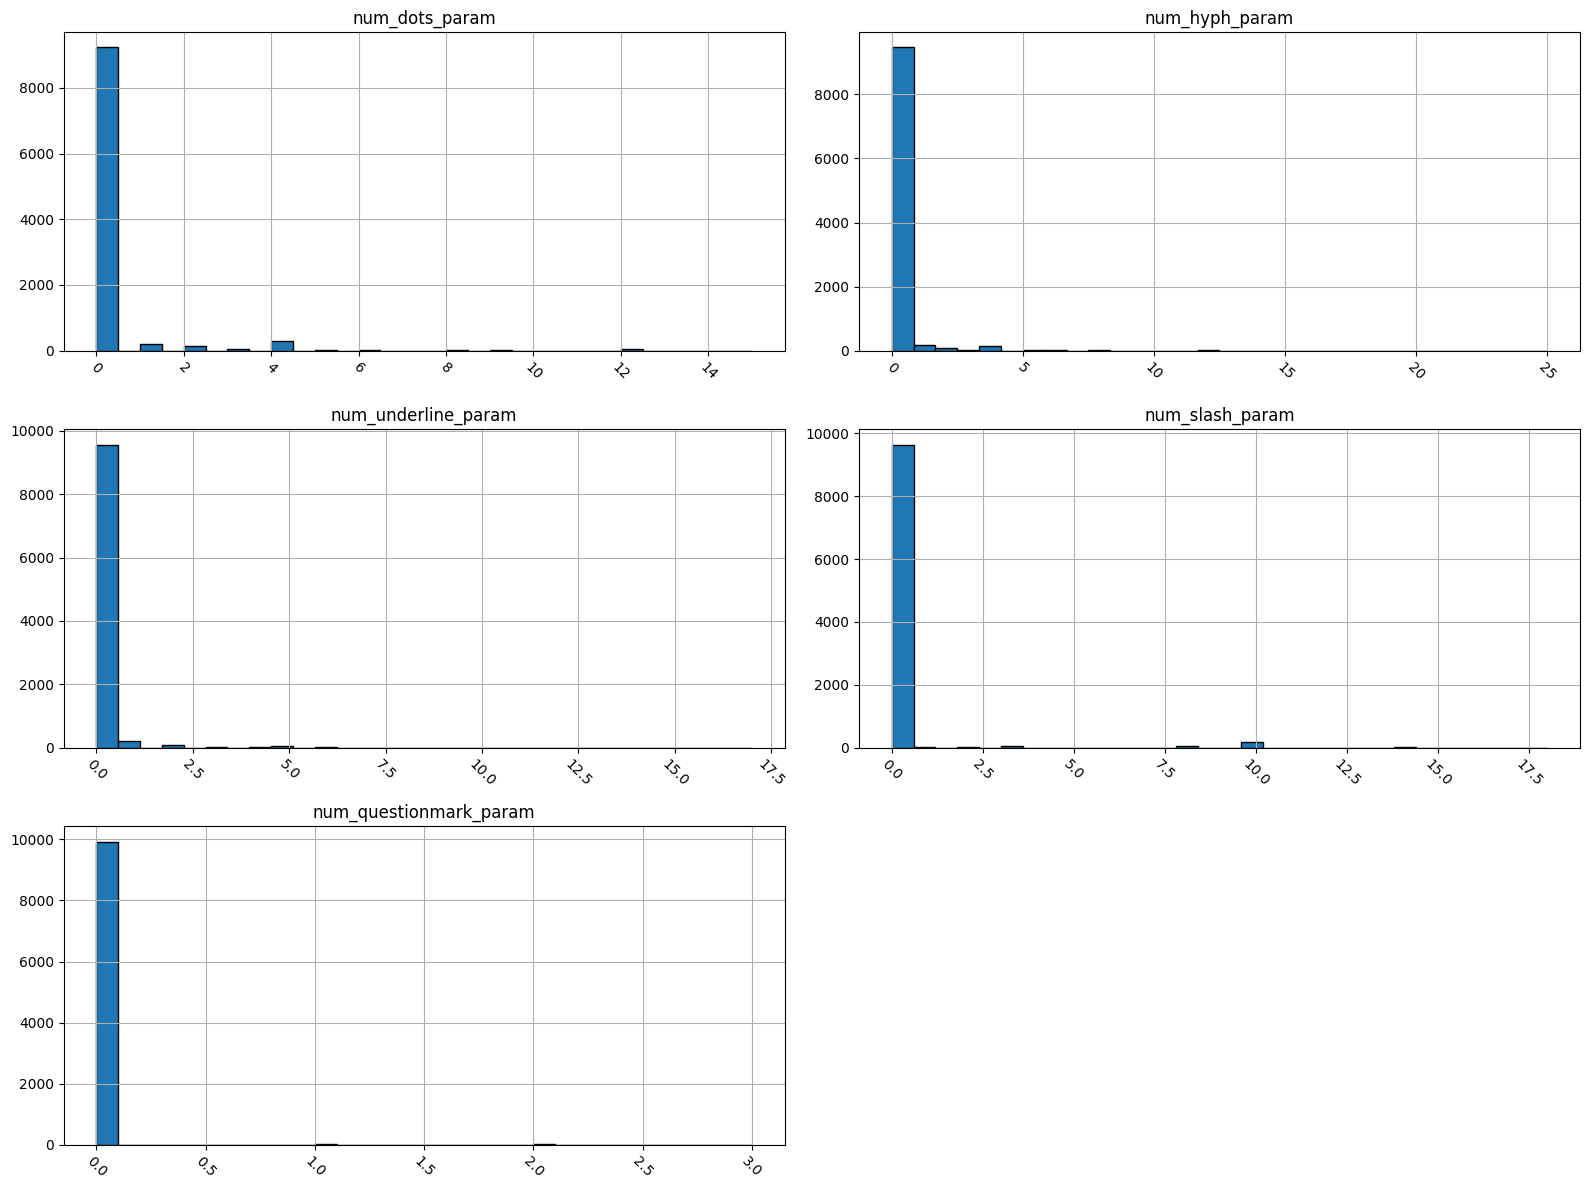

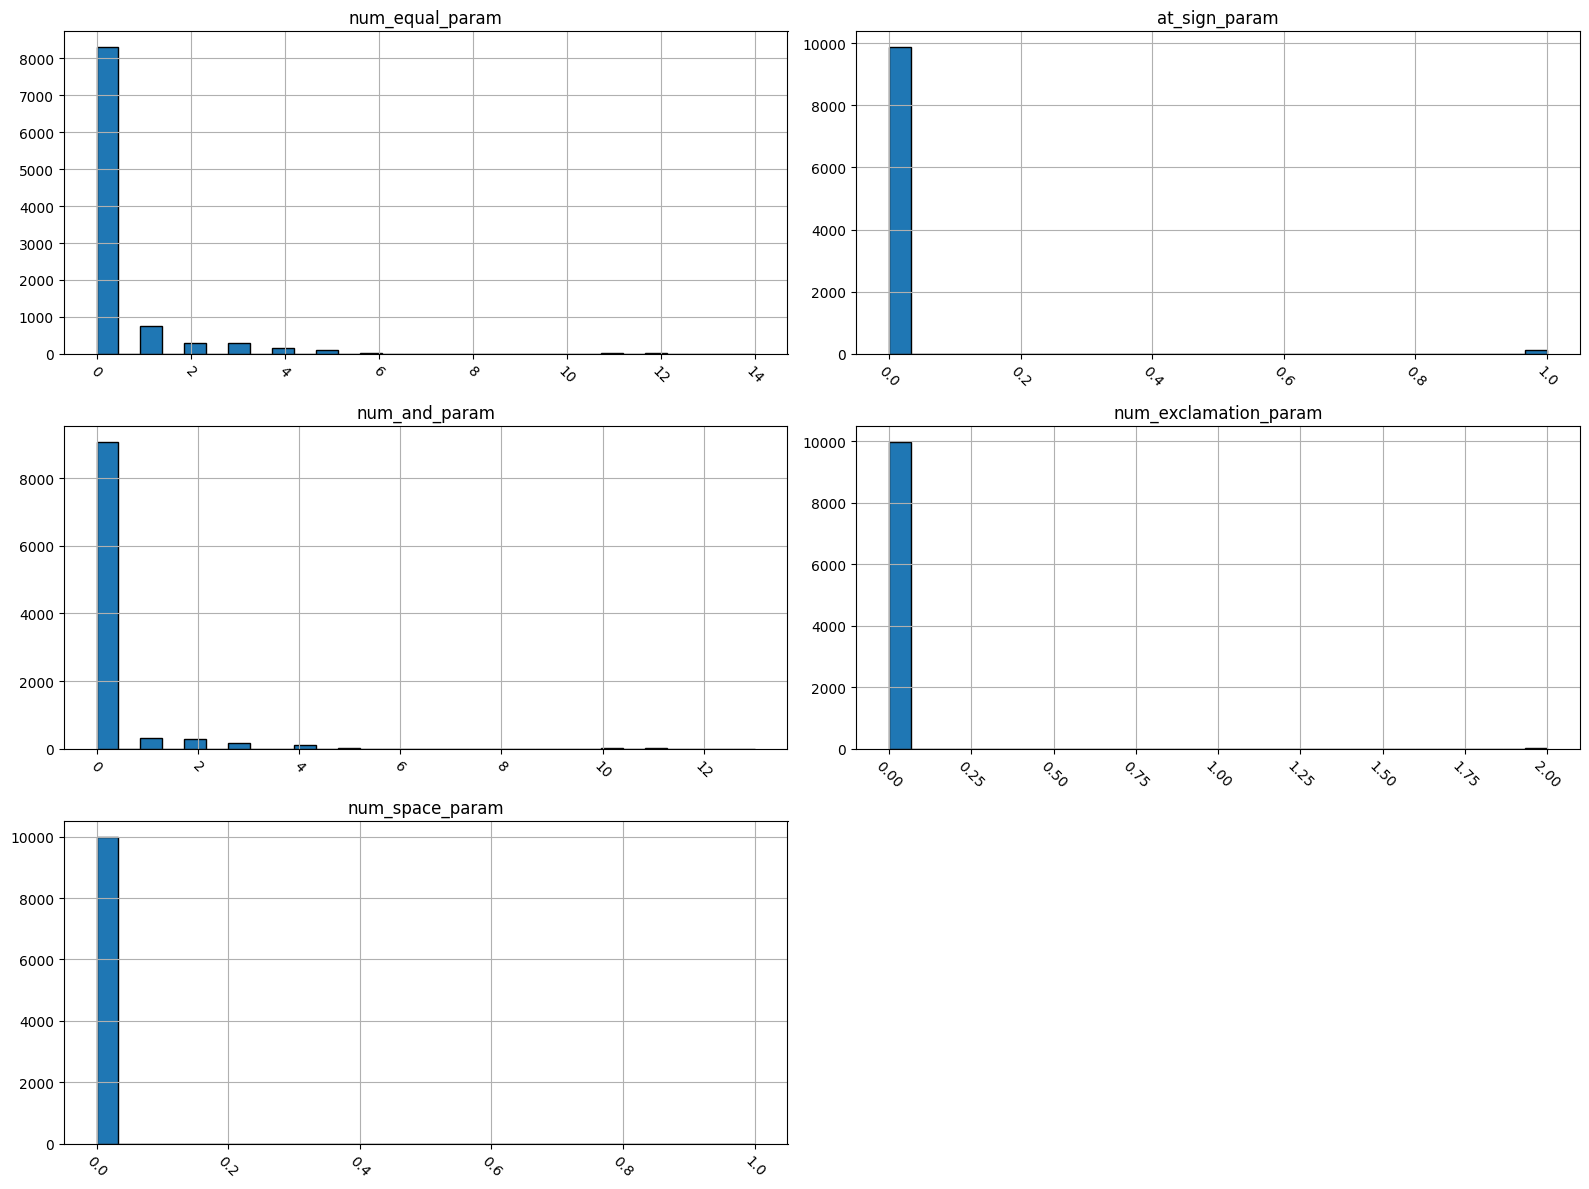

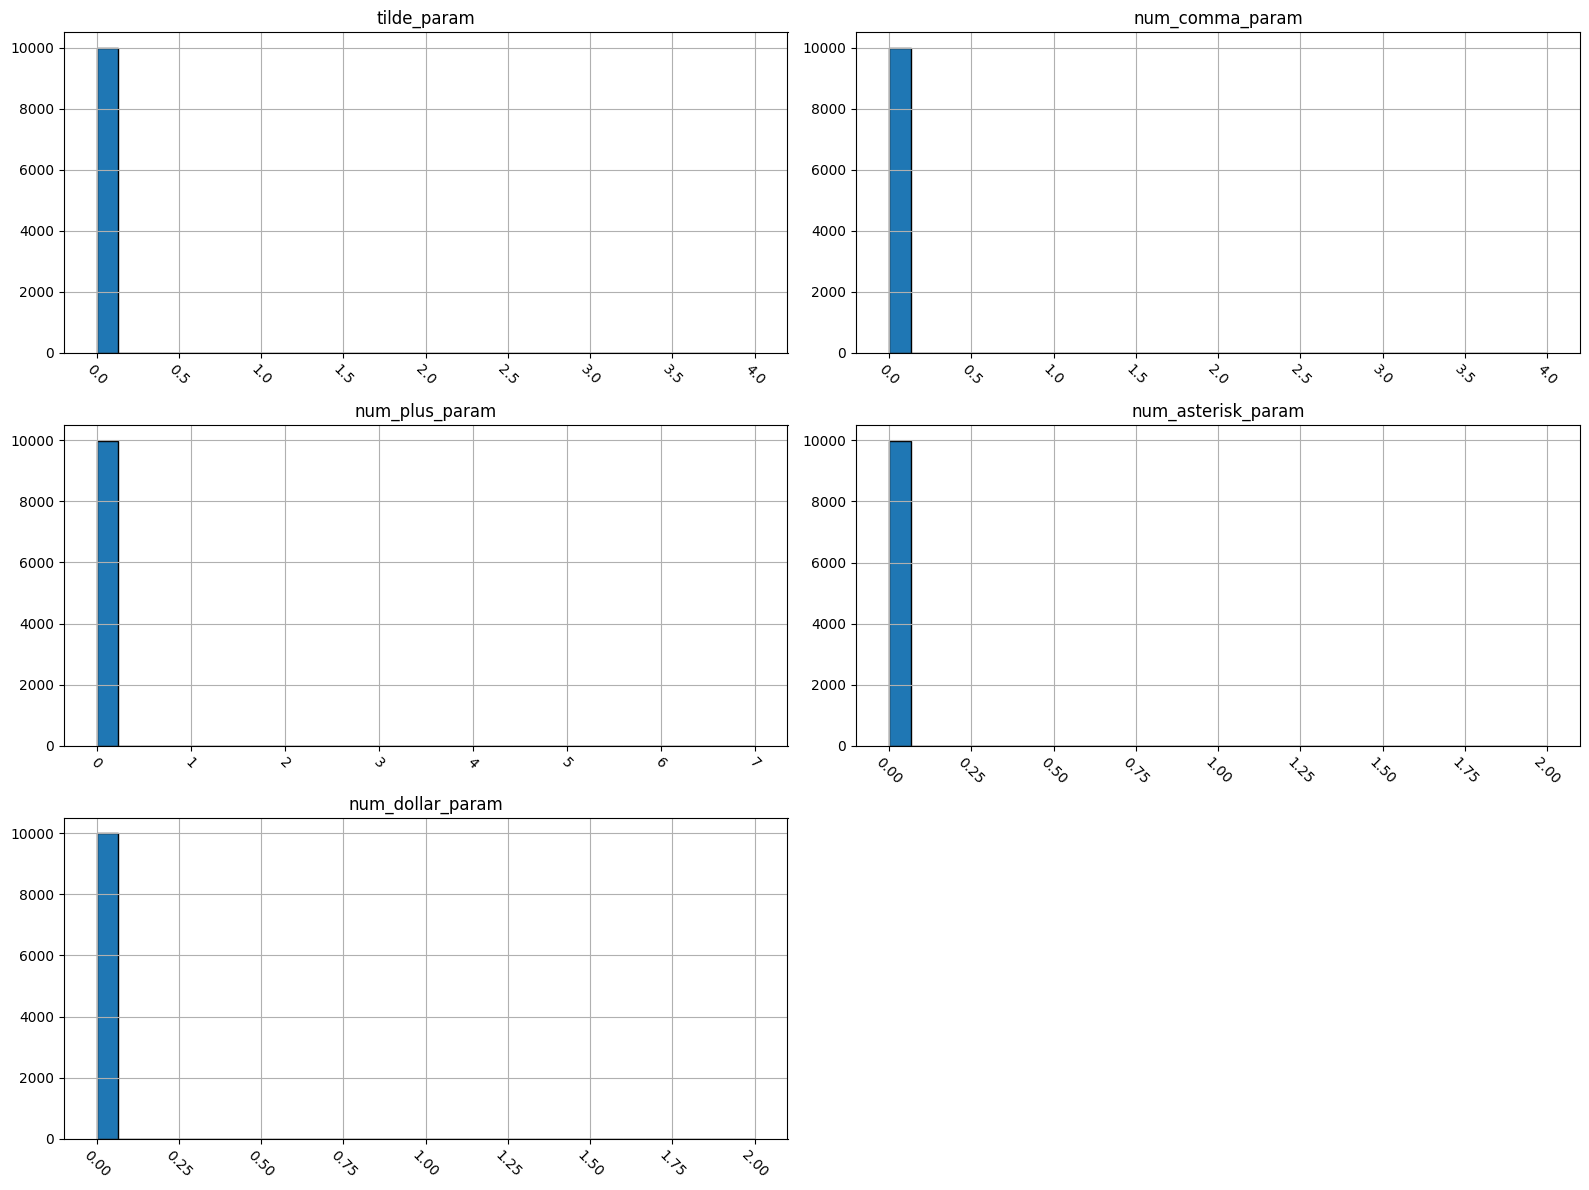

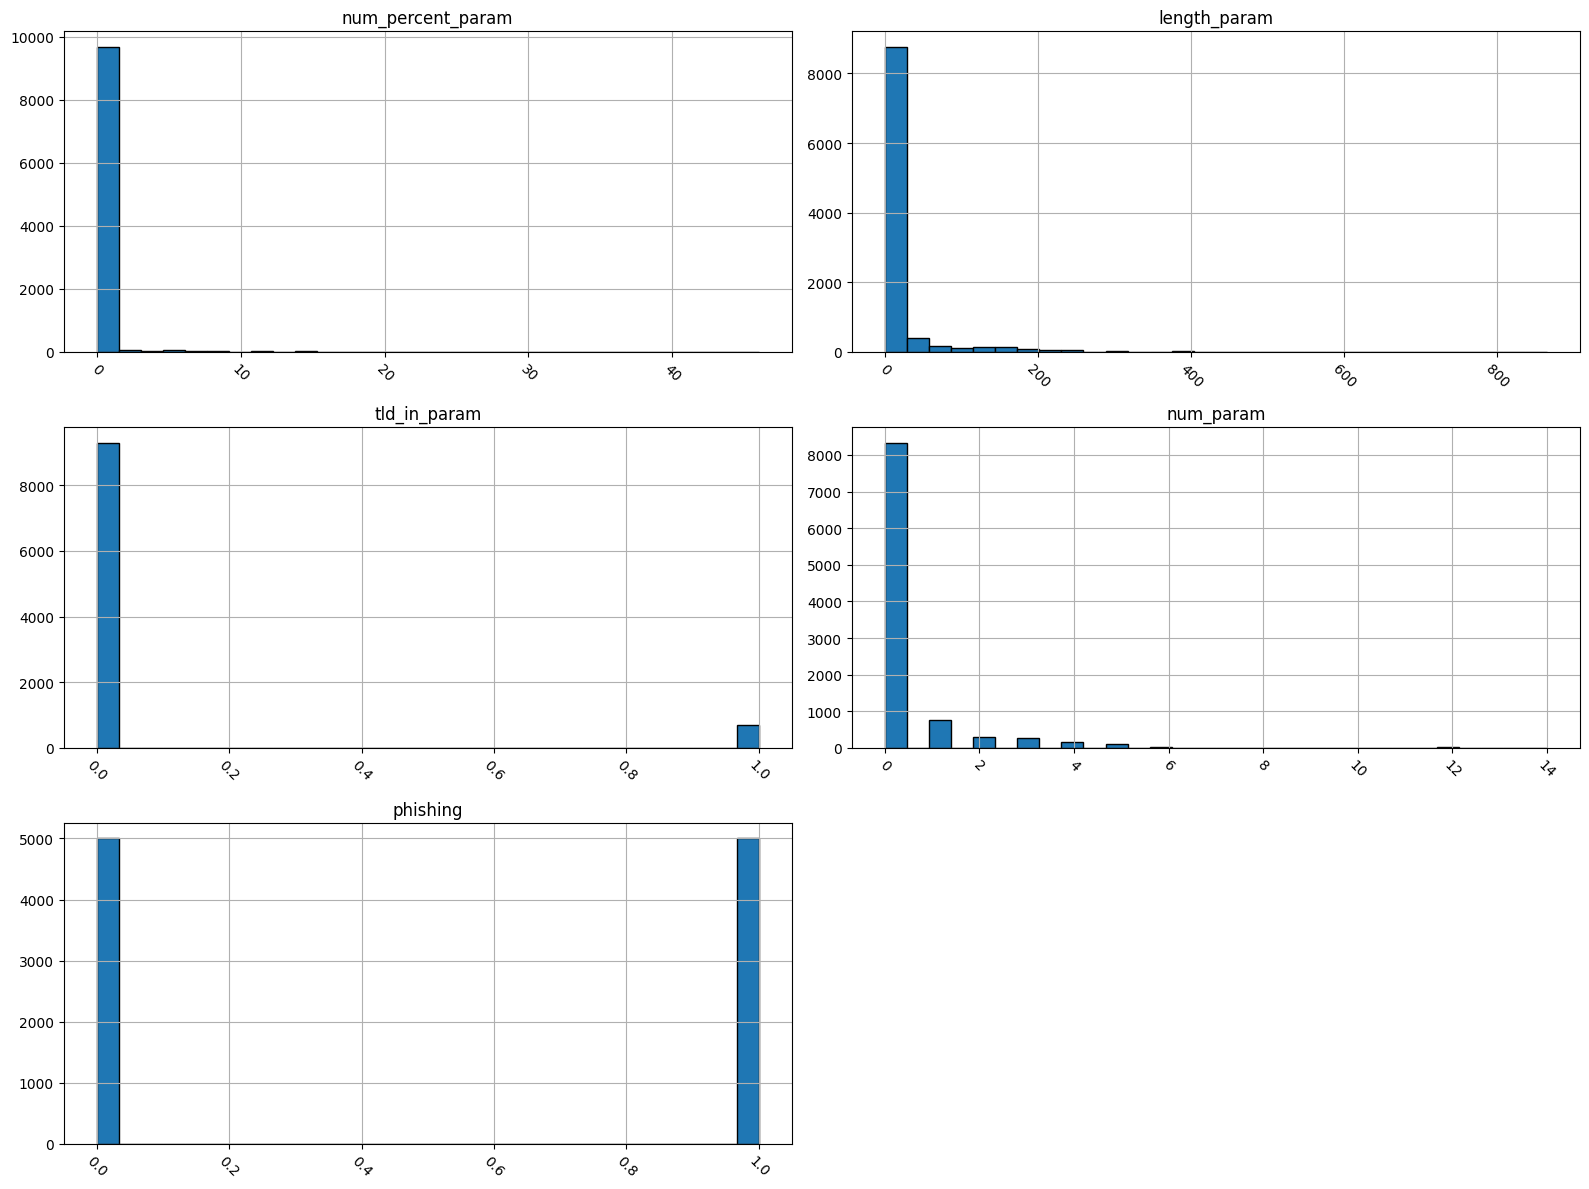

In [9]:
import matplotlib.pyplot as plt
n_cols = 5
n_rows = (len(df.columns) + n_cols - 1) // n_cols

for i in range(n_rows):
    cols = df.columns[i*n_cols : (i+1)*n_cols]
    df[cols].hist(figsize=(16, 12), bins=30, edgecolor='black', xrot=-45)
    plt.tight_layout()
    plt.show()

In [10]:
df

num_dots_url  num_hyph_url  num_underline_url  num_slash_url  \
0                1             0                  0              1   
1                2             1                  0              1   
2                1             0                  0              1   
3                5             1                  0              2   
4                2             0                  0              1   
...            ...           ...                ...            ...   
9995             2             0                  0              1   
9996             1             0                  0              4   
9997             2             0                  0              1   
9998             2             0                  0              0   
9999             3             1                  0              3   

      num_questionmark_url  num_equal_url  at_sign_url  num_and_url  \
0                        0              0            0            0   
1                        0              0            0            0   
2                        0              0            0            0   
3                        0              0            0            0   
4                        0              0            0            0   
...                    ...            ...          ...          ...   
9995                     0              0            0            0   
9996                     0              0            0            0   
9997                     0              0            0            0   
9998                     0              0            0            0   
9999                     0              0            0            0   

      num_exclamation_url  num_space_url  ...  tilde_param  num_comma_param  \
0                       0              0  ...            0                0   
1                       0              0  ...            0                0   
2                       0              0  ...            0                0   
3                       0              0  ...            0                0   
4                       0              0  ...            0                0   
...                   ...            ...  ...          ...              ...   
9995                    0              0  ...            0                0   
9996                    0              0  ...            0                0   
9997                    0              0  ...            0                0   
9998                    0              0  ...            0                0   
9999                    0              0  ...            0                0   

      num_plus_param  num_asterisk_param  num_dollar_param  num_percent_param  \
0                  0                   0                 0                  0   
1                  0                   0                 0                  0   
2                  0                   0                 0                  0   
3                  0                   0                 0                  0   
4                  0                   0                 0                  0   
...              ...                 ...               ...                ...   
9995               0                   0                 0                  0   
9996               0                   0                 0                  0   
9997               0                   0                 0                  0   
9998               0                   0                 0                  0   
9999               0                   0                 0                  0   

      length_param  tld_in_param  num_param  phishing  
0                0             0          0         0  
1                0             0          0         1  
2                0             0          0         1  
3                0             0          0         1  
4                0             0          0         0  
...            ...           ...        ...       ... 

In [11]:
X = df.iloc[: ,:-1].values
Y = df['phishing'].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.10,random_state=22, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9000, 74), (9000,), (1000, 74), (1000,))

In [13]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Time: 0.4300 seconds
Testing Time: 0.0006 seconds
*******************************************
Training Accuracy: 0.8554444444444445
Testing Accuracy: 0.847
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       485
           1       0.90      0.79      0.84       515

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000

Accuracy Score: 0.847
Precision Score: 0.8513538590631102
Recall Score: 0.8486938244419978
F1 Score: 0.8468528255653683
Matthews Correlation Coefficient: 0.700042629699565
*******************************************
[[439  46]
 [107 408]]
True Positive =  408
False Positive =  46
False Negative =  107
True Negative =  439
*******************************************


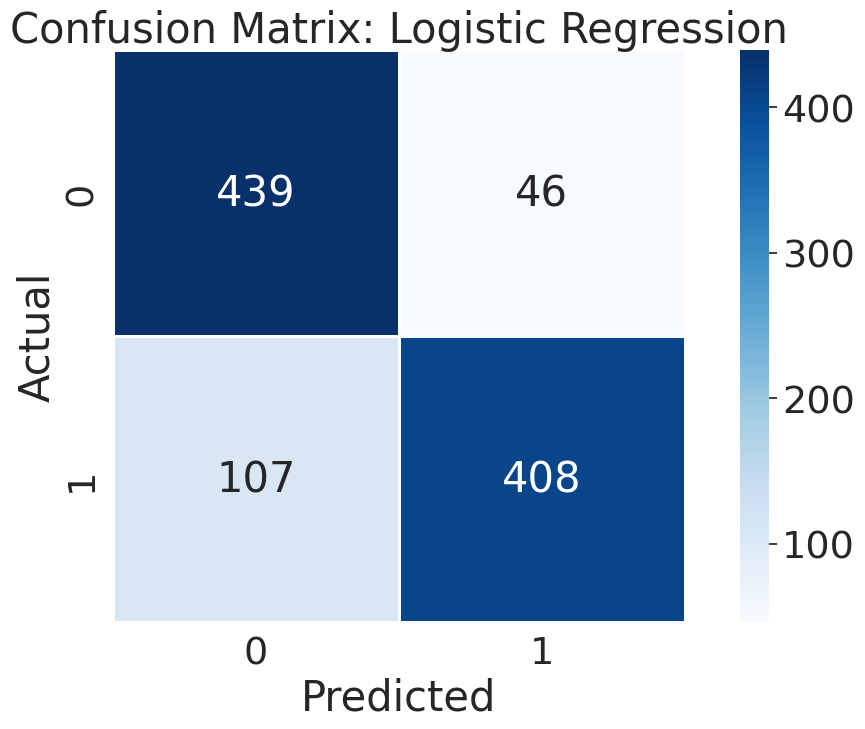

AUC Score = 0.849


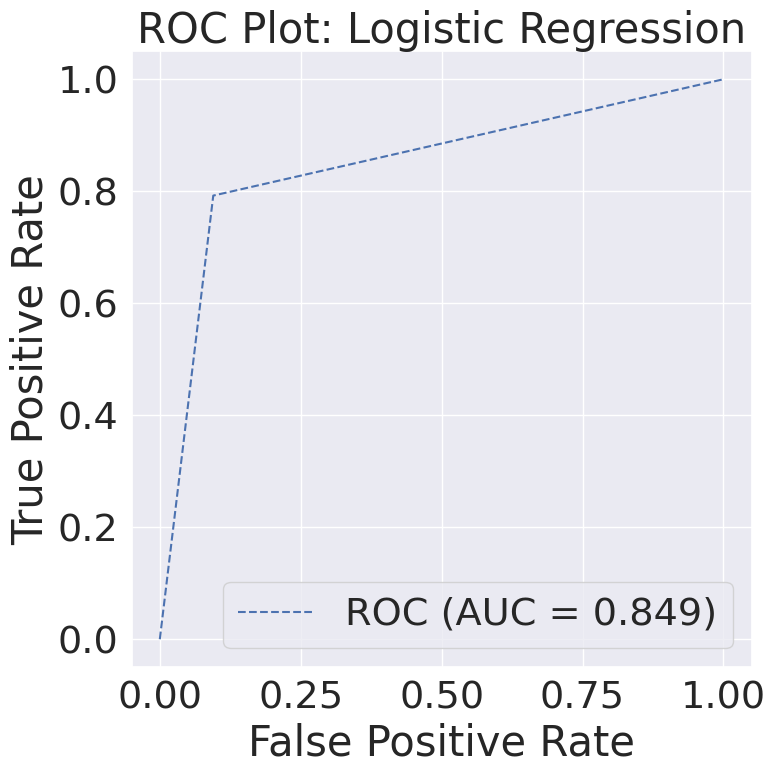

In [14]:
import time
from sklearn.linear_model import LogisticRegression
# Initialize the model
model1 = LogisticRegression(C=1.0)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model1.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions1 = model1.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, model1.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions1)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
report = classification_report(y_test, predictions1)
print("Classification Report:\n", report)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions1)
precision = precision_score(y_test, predictions1, average='macro')
recall = recall_score(y_test, predictions1, average='macro')
f1 = f1_score(y_test, predictions1, average='macro')
mcc = matthews_corrcoef(y_test, predictions1)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions1)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':30}, fmt=".0f", square=True, cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Logistic Regression')
plt.tight_layout()
plt.show()

# ROC curve
lr_auc = roc_auc_score(y_test, predictions1)
print('AUC Score = %.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions1)

plt.figure(figsize=(8, 8))
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='ROC (AUC = %0.3f)' % lr_auc)
plt.title('ROC Plot: Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.1342 seconds
Testing Time: 0.0086 seconds
*******************************************
Training Accuracy: 0.8756666666666667
Testing Accuracy: 0.886
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       485
           1       0.89      0.88      0.89       515

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

Accuracy Score: 0.886
Precision Score: 0.8858550170255162
Recall Score: 0.8860774697227505
F1 Score: 0.8859342981557377
Matthews Correlation Coefficient: 0.7719324546954613
*******************************************
[[431  54]
 [ 60 455]]
True Positive =  455
False Positive =  54
False Negative =  60
True Negative =  431
*******************************************


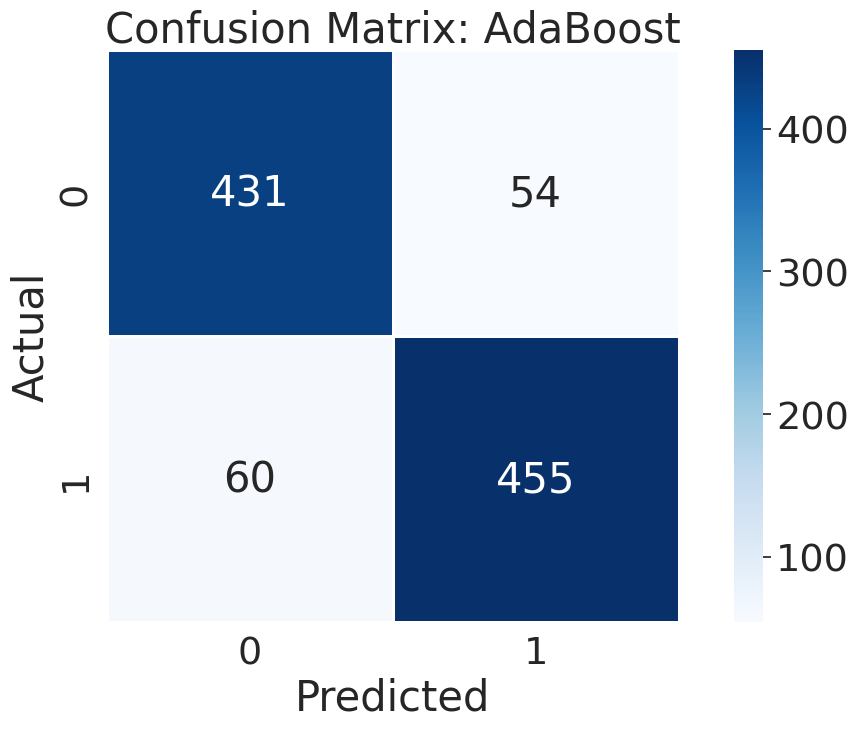

AUC Score = 0.886


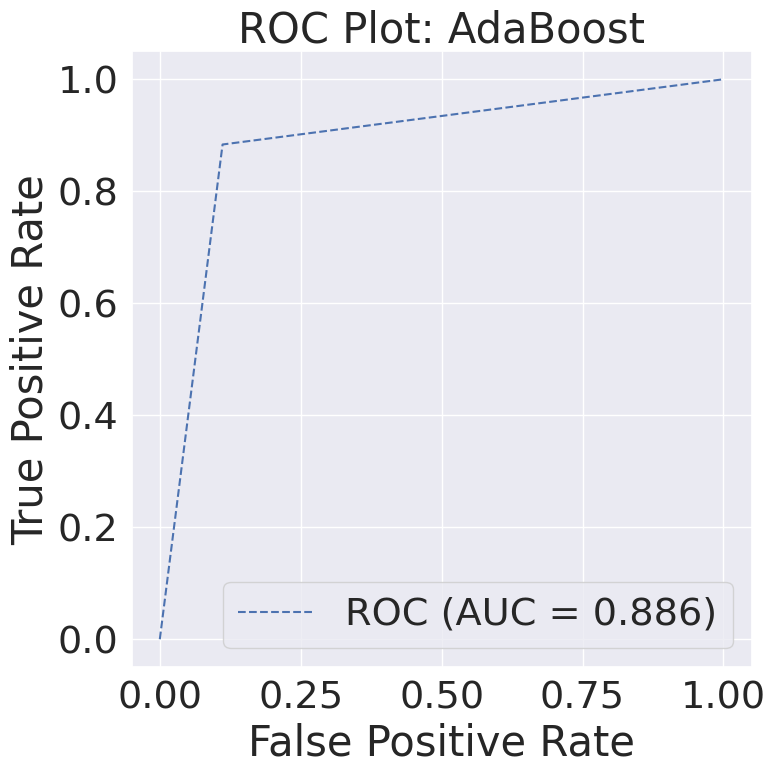

In [15]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize the model
model3 = AdaBoostClassifier(n_estimators=10)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model3.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions3 = model3.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, model3.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions3)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
report = classification_report(y_test, predictions3)
print("Classification Report:\n", report)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions3)
precision = precision_score(y_test, predictions3, average='macro')
recall = recall_score(y_test, predictions3, average='macro')
f1 = f1_score(y_test, predictions3, average='macro')
mcc = matthews_corrcoef(y_test, predictions3)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions3)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: AdaBoost')
plt.tight_layout()
plt.show()

# ROC curve
ab_auc = roc_auc_score(y_test, predictions3)
print('AUC Score = %.3f' % (ab_auc))
ab_fpr, ab_tpr, _ = roc_curve(y_test, predictions3)

plt.figure(figsize=(8, 8))
plt.plot(ab_fpr, ab_tpr, linestyle='--', label='ROC (AUC = %0.3f)' % ab_auc)
plt.title('ROC Plot: AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 12.8795 seconds
Testing Time: 0.0021 seconds
*******************************************
Training Accuracy: 0.9131111111111111
Testing Accuracy: 0.902
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       485
           1       0.91      0.90      0.90       515

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

Accuracy Score: 0.902
Precision Score: 0.9018602027056766
Recall Score: 0.902091882694425
F1 Score: 0.9019435194672131
Matthews Correlation Coefficient: 0.8039520520177525
*******************************************
[[439  46]
 [ 52 463]]
True Positive =  463
False Positive =  46
False Negative =  52
True Negative =  439
*******************************************


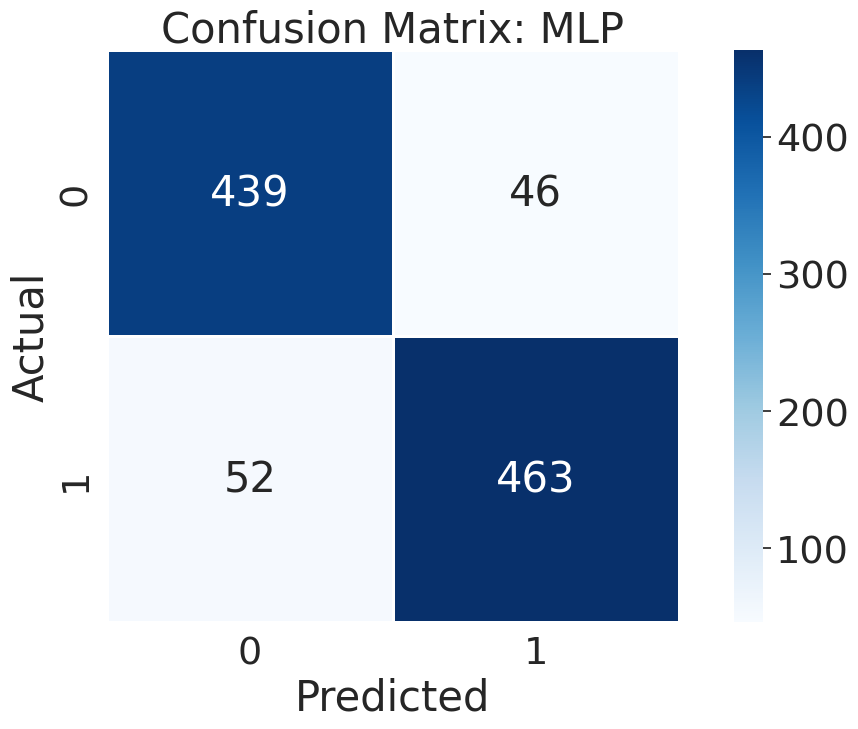

AUC Score = 0.902


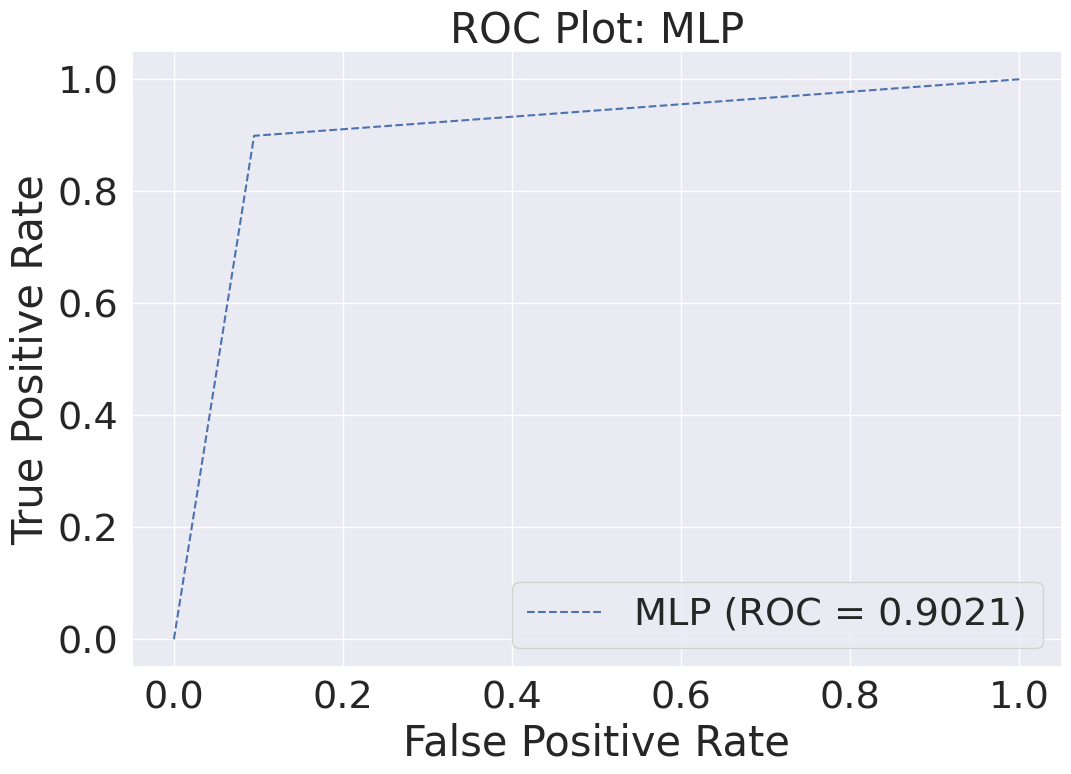

In [16]:
from sklearn.neural_network import MLPClassifier
# Initialize the model
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model_mlp.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions_mlp = model_mlp.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_mlp.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_mlp)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
report = classification_report(y_test, predictions_mlp)
print("Classification Report:\n", report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_mlp)
precision = precision_score(y_test, predictions_mlp, average='macro')
recall = recall_score(y_test, predictions_mlp, average='macro')
f1 = f1_score(y_test, predictions_mlp, average='macro')
mcc = matthews_corrcoef(y_test, predictions_mlp)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_mlp)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: MLP')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
mlp_auc = roc_auc_score(y_test, predictions_mlp)
print('AUC Score = %.3f' % mlp_auc)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, predictions_mlp)

plt.figure(figsize=(12, 8))
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='MLP (ROC = %0.4f)' % mlp_auc)
plt.title('ROC Plot: MLP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0498 seconds
Testing Time: 0.0007 seconds
*******************************************
Training Accuracy: 0.9262222222222222
Testing Accuracy: 0.893
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       485
           1       0.92      0.87      0.89       515

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

Accuracy Score: 0.893
Precision Score: 0.8934573829531813
Recall Score: 0.8936542888599739
F1 Score: 0.8929973249331233
Matthews Correlation Coefficient: 0.7871116471839076
*******************************************
[[444  41]
 [ 66 449]]
True Positive =  449
False Positive =  41
False Negative =  66
True Negative =  444
*******************************************


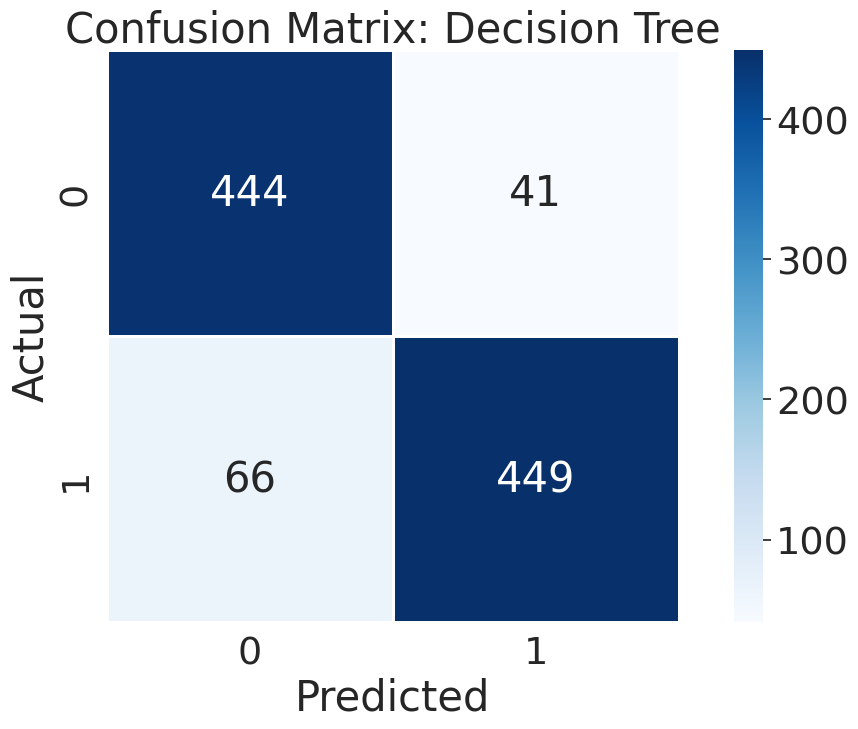

AUC Score = 0.894


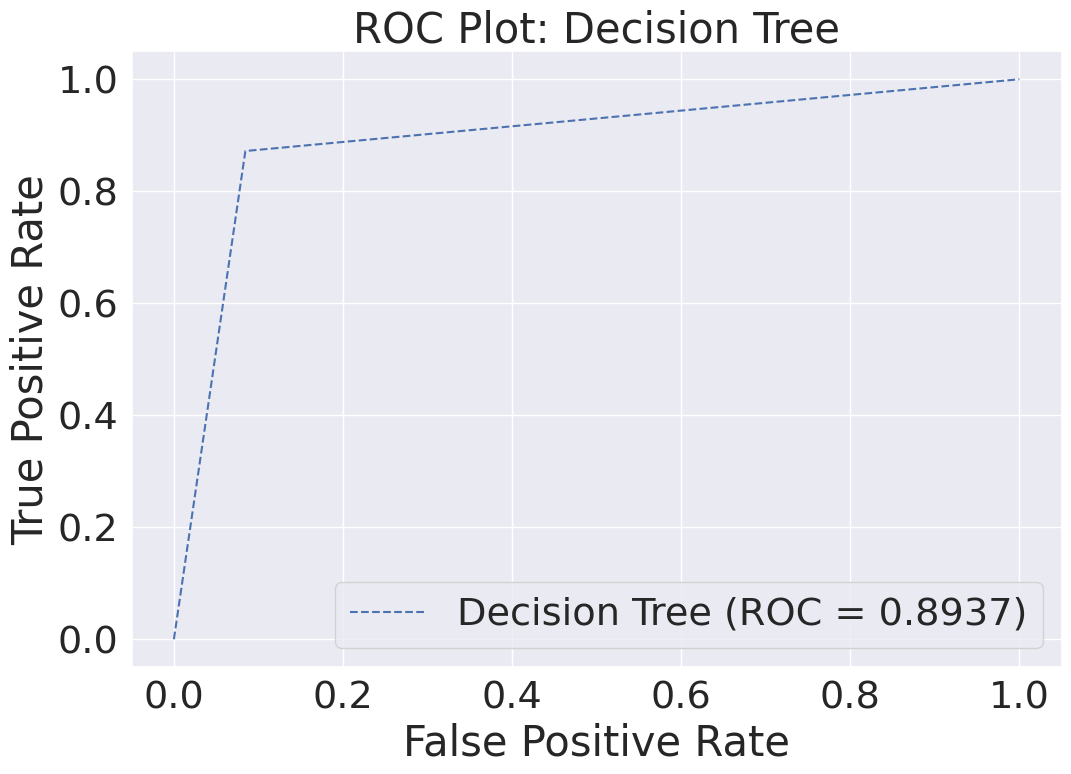

In [17]:

from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree (no n_estimators)
model_dt = DecisionTreeClassifier(max_depth=10, random_state=42)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model_dt.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions_dt = model_dt.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_dt)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_dt)
print("Classification Report:\n", report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_dt)
precision = precision_score(y_test, predictions_dt, average='macro')
recall = recall_score(y_test, predictions_dt, average='macro')
f1 = f1_score(y_test, predictions_dt, average='macro')
mcc = matthews_corrcoef(y_test, predictions_dt)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_dt)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Decision Tree')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
dt_auc = roc_auc_score(y_test, predictions_dt)
print('AUC Score = %.3f' % dt_auc)

dt_fpr, dt_tpr, _ = roc_curve(y_test, predictions_dt)

plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree (ROC = %0.4f)' % dt_auc)
plt.title('ROC Plot: Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0911 seconds
Testing Time: 0.0033 seconds
Training Accuracy: 0.9087777777777778
Testing Accuracy: 0.895
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       485
           1       0.89      0.91      0.90       515

    accuracy                           0.90      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.90      0.89      1000

Accuracy Score: 0.895
Precision Score: 0.8953999743194658
Recall Score: 0.8945150635572015
F1 Score: 0.8948054953609224
Matthews Correlation Coefficient: 0.789914542211143
*******************************************
[[426  59]
 [ 46 469]]
True positive =  469
False positive =  59
False negative =  46
True negative =  426
*******************************************


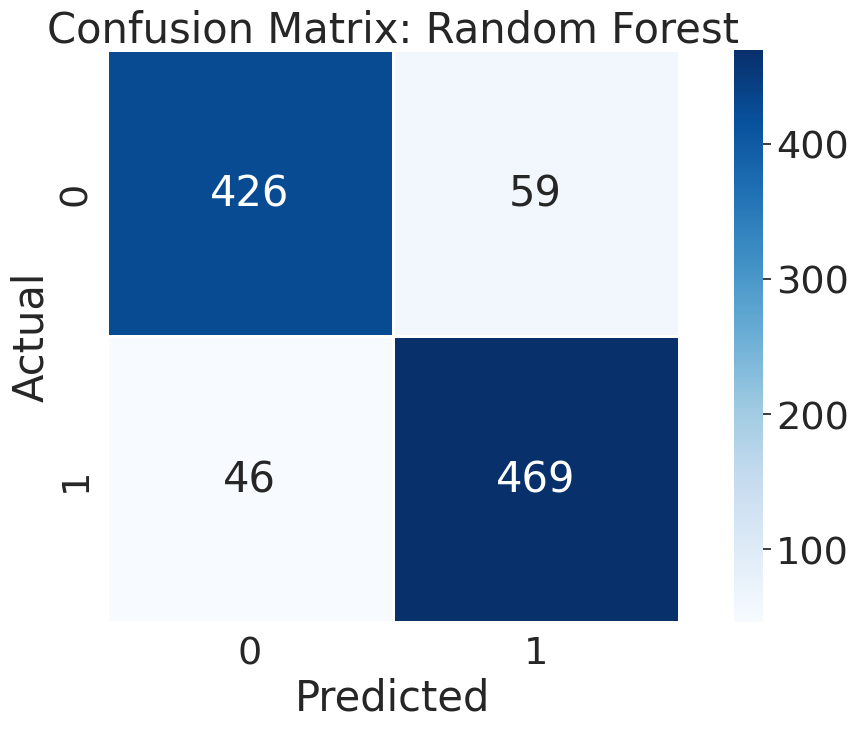

AUC Score = 0.895


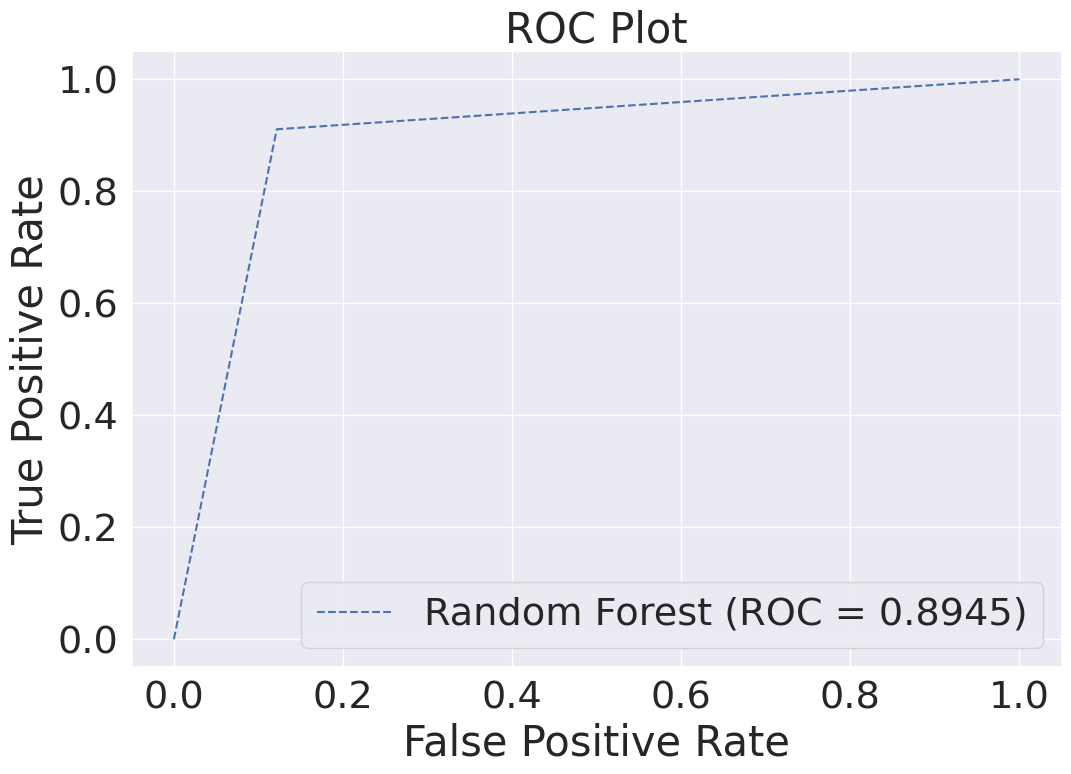

In [18]:
from sklearn.ensemble import RandomForestClassifier
# Initialize model
model_rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)

# Measure training time
start_train = time.time()
model_rf.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_rf = model_rf.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_rf)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_rf)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_rf)
precision = precision_score(y_test, predictions_rf, average='macro')
recall = recall_score(y_test, predictions_rf, average='macro')
f1 = f1_score(y_test, predictions_rf, average='macro')
mcc = matthews_corrcoef(y_test, predictions_rf)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_rf)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Random Forest')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
rf_auc = roc_auc_score(y_test, predictions_rf)
print('AUC Score = %.3f' % rf_auc)

rf_fpr, rf_tpr, _ = roc_curve(y_test, predictions_rf)

plt.figure(figsize=(12, 8))
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (ROC = %0.4f)' % rf_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0021 seconds
Testing Time: 0.2009 seconds
Training Accuracy: 0.9113333333333333
Testing Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       485
           1       0.90      0.90      0.90       515

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

Accuracy Score: 0.898
Precision Score: 0.8978789661811384
Recall Score: 0.8979681713542188
F1 Score: 0.8979199692558967
Matthews Correlation Coefficient: 0.795847132535928
*******************************************
[[435  50]
 [ 52 463]]
True positive =  463
False positive =  50
False negative =  52
True negative =  435
*******************************************


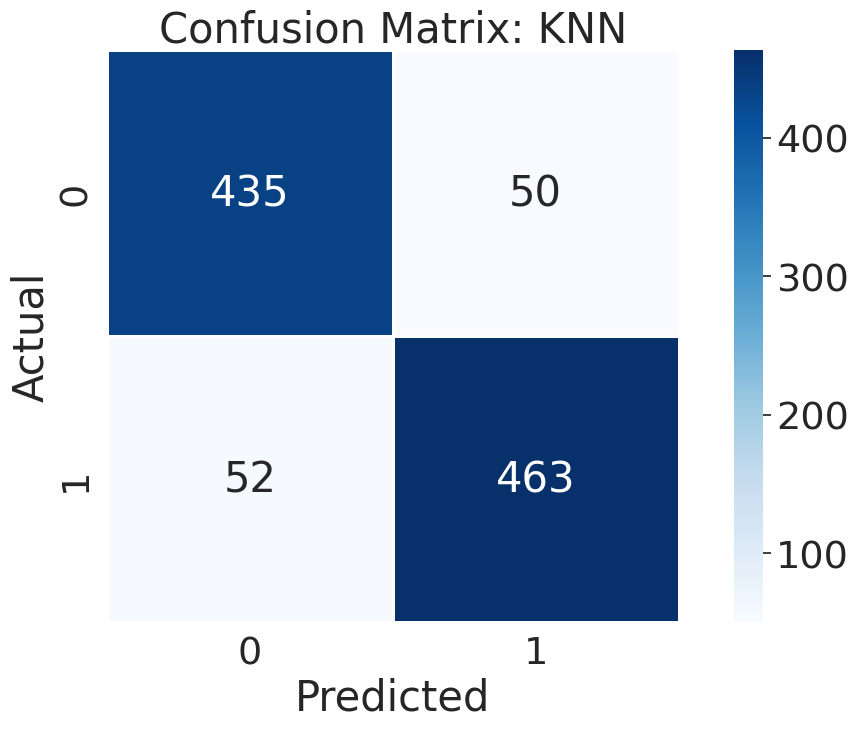

AUC Score = 0.898


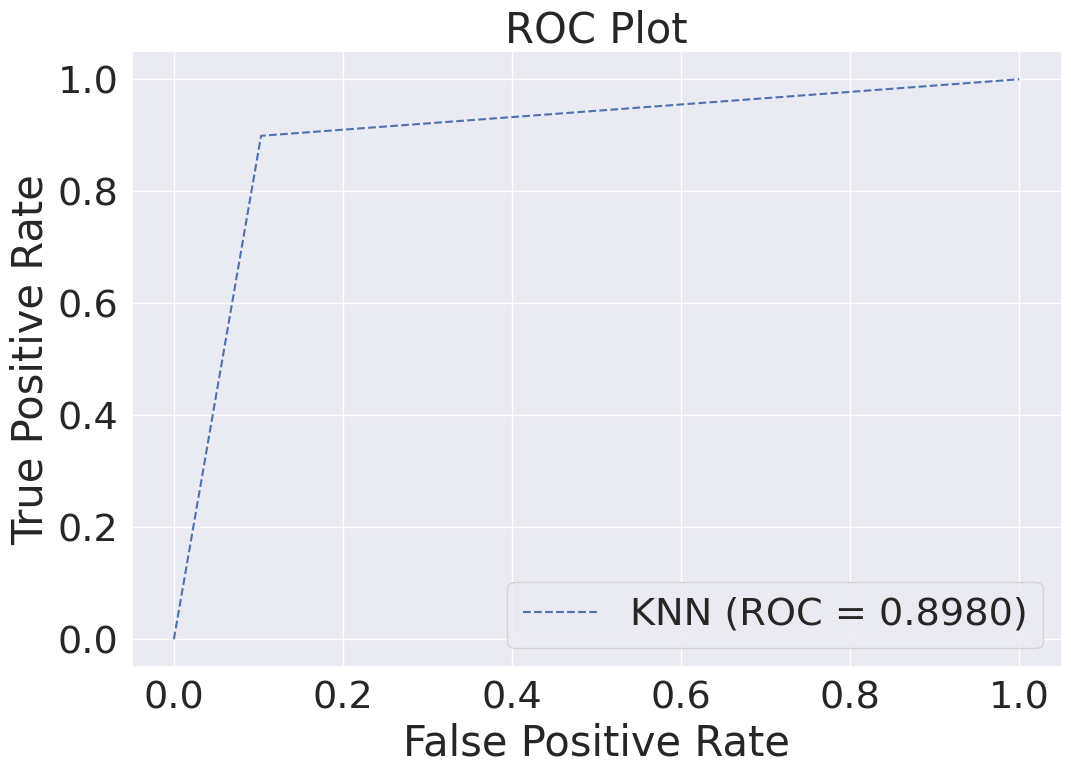

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)

# Measure training time
start_train = time.time()
model_knn.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_knn = model_knn.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_knn)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_knn)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_knn)
precision = precision_score(y_test, predictions_knn, average='macro')
recall = recall_score(y_test, predictions_knn, average='macro')
f1 = f1_score(y_test, predictions_knn, average='macro')
mcc = matthews_corrcoef(y_test, predictions_knn)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_knn)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: KNN')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
knn_auc = roc_auc_score(y_test, predictions_knn)
print('AUC Score = %.3f' % knn_auc)

knn_fpr, knn_tpr, _ = roc_curve(y_test, predictions_knn)

plt.figure(figsize=(12, 8))
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='KNN (ROC = %0.4f)' % knn_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 20.9243 seconds
Testing Time: 0.3085 seconds
Training Accuracy: 0.8706666666666667
Testing Accuracy: 0.873
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       485
           1       0.91      0.83      0.87       515

    accuracy                           0.87      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000

Accuracy Score: 0.873
Precision Score: 0.8752509032517062
Recall Score: 0.8742368131318186
F1 Score: 0.872971418569178
Matthews Correlation Coefficient: 0.7494870303287573
*******************************************
[[444  41]
 [ 86 429]]
True positive =  429
False positive =  41
False negative =  86
True negative =  444
*******************************************


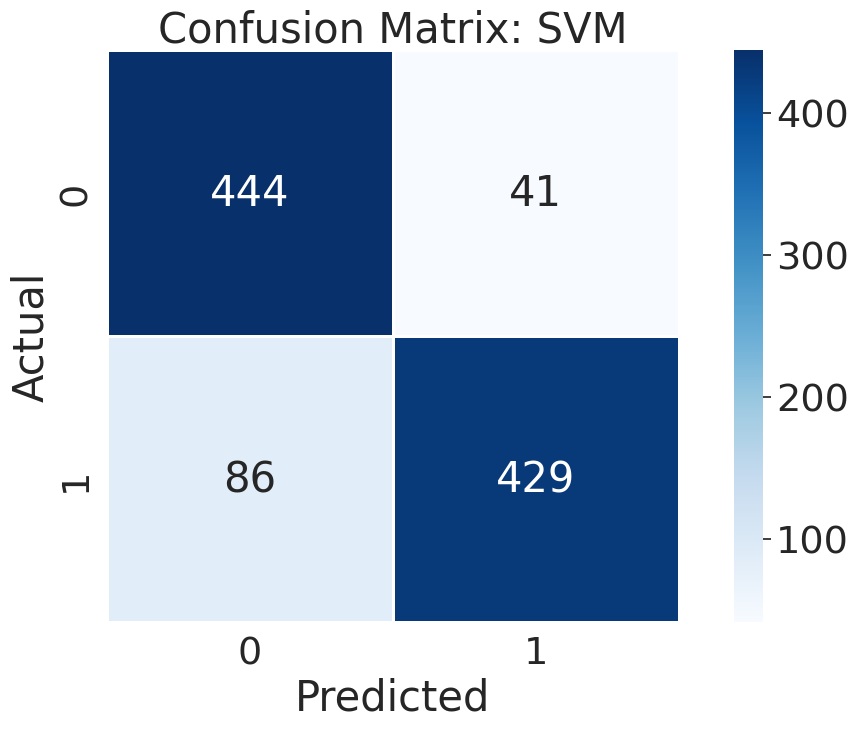

AUC Score = 0.941


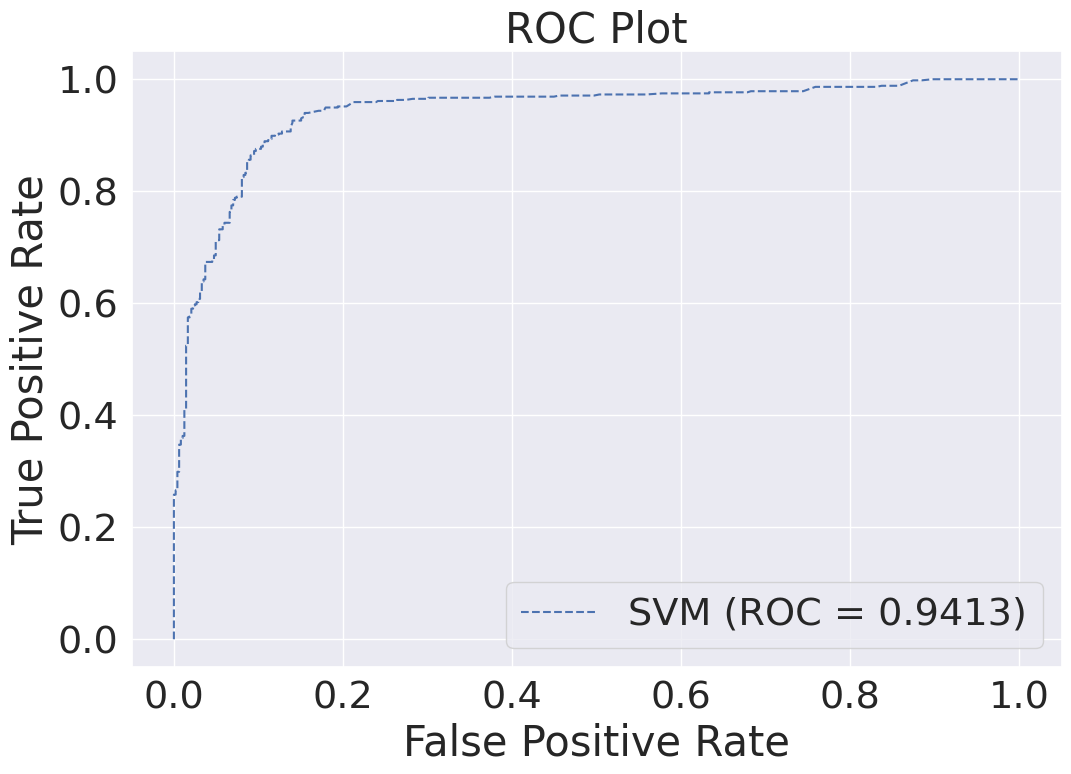

In [20]:
from sklearn.svm import SVC
# Initialize SVM model
model_svm = SVC(kernel='rbf', probability=True, random_state=42)

# Measure training time
start_train = time.time()
model_svm.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_svm = model_svm.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_svm)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_svm)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_svm)
precision = precision_score(y_test, predictions_svm, average='macro')
recall = recall_score(y_test, predictions_svm, average='macro')
f1 = f1_score(y_test, predictions_svm, average='macro')
mcc = matthews_corrcoef(y_test, predictions_svm)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_svm)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: SVM')
plt.tight_layout()
plt.show()

# ROC Curve and AUC (need probability estimates)
svm_probs = model_svm.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
print('AUC Score = %.3f' % svm_auc)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(12, 8))
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM (ROC = %0.4f)' % svm_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.1604 seconds
Testing Time: 0.0010 seconds
Training Accuracy: 0.851
Testing Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       485
           1       0.90      0.78      0.83       515

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000

Accuracy Score: 0.84
Precision Score: 0.8458345986435873
Recall Score: 0.8419577619857872
F1 Score: 0.8397435897435896
Matthews Correlation Coefficient: 0.6877814343798881
*******************************************
[[440  45]
 [115 400]]
True positive =  400
False positive =  45
False negative =  115
True negative =  440
*******************************************


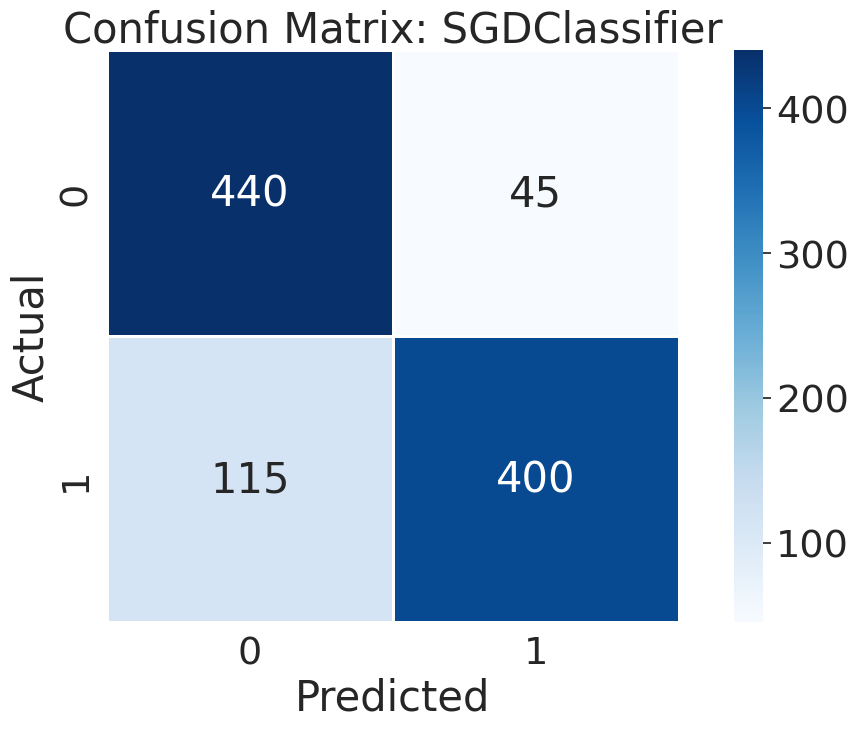

AUC Score = 0.930


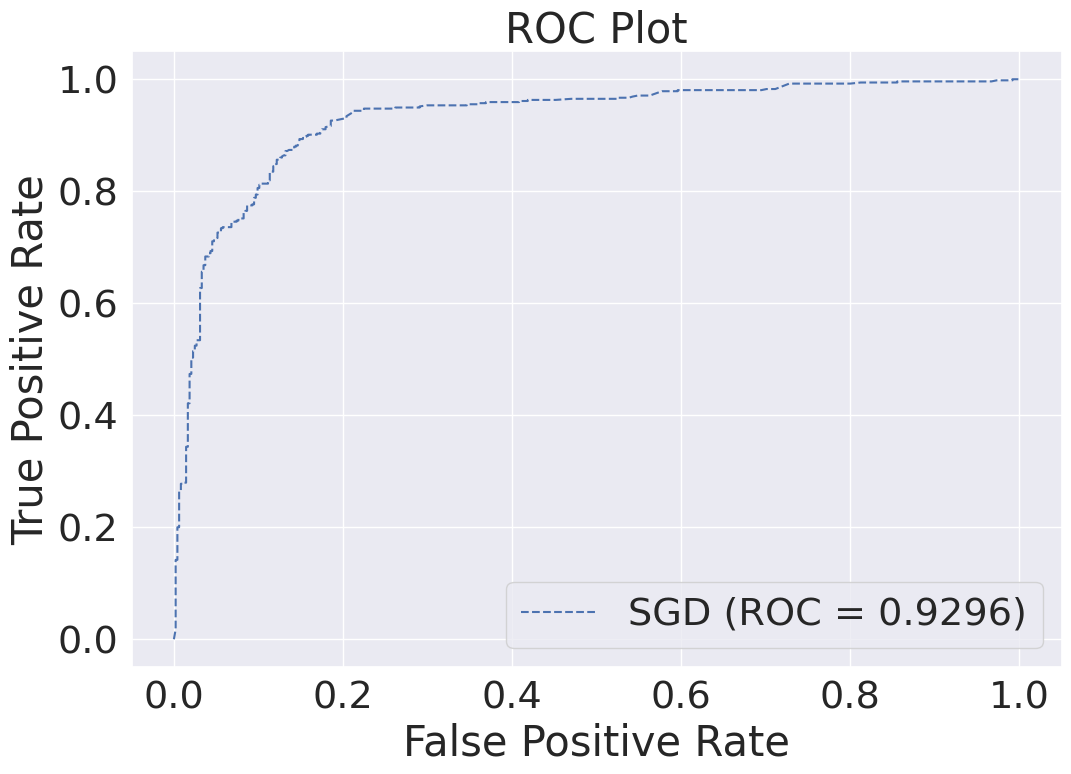

In [21]:
from sklearn.linear_model import SGDClassifier
# Initialize SGD Classifier
model_sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

# Measure training time
start_train = time.time()
model_sgd.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_sgd = model_sgd.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_sgd.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_sgd)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_sgd)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_sgd)
precision = precision_score(y_test, predictions_sgd, average='macro')
recall = recall_score(y_test, predictions_sgd, average='macro')
f1 = f1_score(y_test, predictions_sgd, average='macro')
mcc = matthews_corrcoef(y_test, predictions_sgd)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_sgd)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: SGDClassifier')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
sgd_probs = model_sgd.predict_proba(X_test)[:, 1]
sgd_auc1 = roc_auc_score(y_test, sgd_probs)
print('AUC Score = %.3f' % sgd_auc1)

sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)

plt.figure(figsize=(12, 8))
plt.plot(sgd_fpr, sgd_tpr, linestyle='--', label='SGD (ROC = %0.4f)' % sgd_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


2025-10-31 20:49:30,928 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.7, 'k': 30, 'p': 2}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.0976
2025-10-31 21:35:05,726 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0975555555555555, best pos: [168.9120445   22.48802125   0.23965863   8.3282267    1.89137582
   0.78565324]



Best Hyperparameters from PSO:
  n_estimators       : 168
  max_depth          : 22
  max_features       : 0.240
  min_samples_split  : 8
  min_samples_leaf   : 1
  criterion          : entropy

Model Evaluation:
Training Accuracy : 0.9364
Testing Accuracy  : 0.9030
Precision          : 0.9029
Recall             : 0.9029
F1 Score           : 0.9029
Matthews Corrcoef  : 0.8058
Training Time      : 1.0217 seconds
Testing Time       : 0.0900 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       485
           1       0.91      0.90      0.91       515

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

Confusion Matrix:
[[437  48]
 [ 49 466]]
True Positives : 466
False Positives: 48
False Negatives: 49
True Negatives : 437


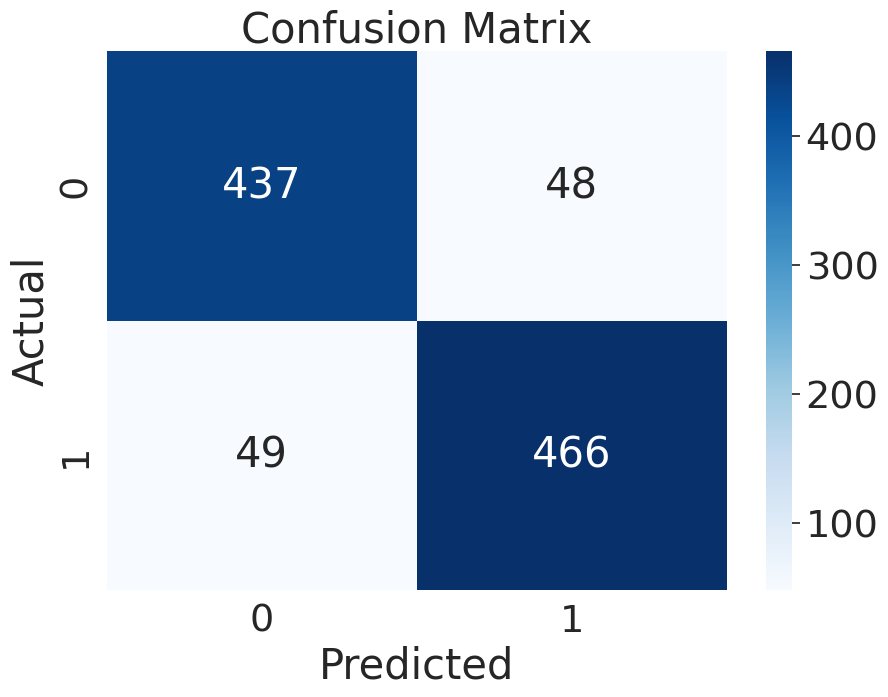

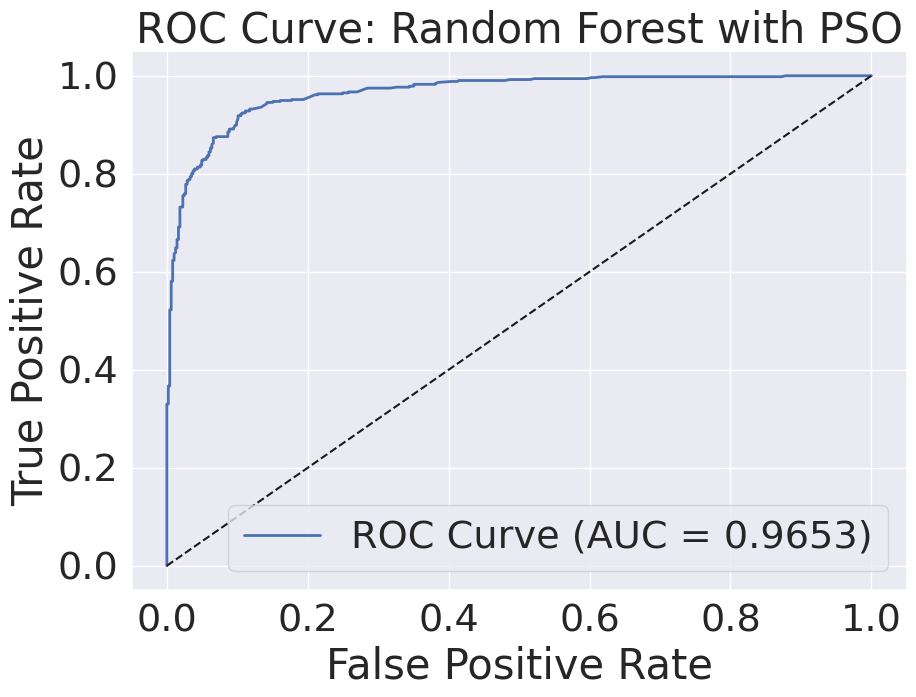

In [22]:
import time

# -----------------------------------------------------------
# PSO search space for Random Forest with 6 hyperparameters
# -----------------------------------------------------------
# [n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf, criterion]
bounds = (
    np.array([50, 0, 0.1, 2, 1, 0]),       # Lower bounds
    np.array([500, 30, 1.0, 20, 20, 1])    # Upper bounds
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)

def objective_function(params):
    losses = []
    for p in params:
        n_estimators = int(p[0])
        max_depth = None if int(p[1]) == 0 else int(p[1])
        max_features = float(p[2])
        min_samples_split = int(p[3])
        min_samples_leaf = int(p[4])
        criterion = 'gini' if int(round(p[5])) == 0 else 'entropy'

        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            criterion=criterion,
            random_state=22,
            n_jobs=-1
        )

        score = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy').mean()
        losses.append(1 - score)

    return np.array(losses)

# -----------------------------------------------------------
# Run PSO
# -----------------------------------------------------------
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.7, 'k': 30, 'p': 2}
optimizer = ps.single.GlobalBestPSO(n_particles=30, dimensions=6, options=options, bounds=bounds)
best_cost, best_params = optimizer.optimize(objective_function, iters=10)

# -----------------------------------------------------------
# Train optimized model
# -----------------------------------------------------------
best_n_estimators = int(best_params[0])
best_max_depth = None if int(best_params[1]) == 0 else int(best_params[1])
best_max_features = float(best_params[2])
best_min_samples_split = int(best_params[3])
best_min_samples_leaf = int(best_params[4])
best_criterion = 'gini' if int(round(best_params[5])) == 0 else 'entropy'

print("\nBest Hyperparameters from PSO:")
print(f"  n_estimators       : {best_n_estimators}")
print(f"  max_depth          : {best_max_depth}")
print(f"  max_features       : {best_max_features:.3f}")
print(f"  min_samples_split  : {best_min_samples_split}")
print(f"  min_samples_leaf   : {best_min_samples_leaf}")
print(f"  criterion          : {best_criterion}")

model_rf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    max_features=best_max_features,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    criterion=best_criterion,
    random_state=42,
    n_jobs=-1
)

# -----------------------------------------------------------
# Measure Training Time
# -----------------------------------------------------------
start_train = time.time()
model_rf.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# -----------------------------------------------------------
# Measure Testing Time
# -----------------------------------------------------------
start_test = time.time()
predictions_rf = model_rf.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

prob_rf = model_rf.predict_proba(X_test)[:, 1]  # for ROC curve

# -----------------------------------------------------------
# Metrics
# -----------------------------------------------------------
train_accuracy = accuracy_score(y_train, model_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_rf)
precision = precision_score(y_test, predictions_rf, average='macro')
recall = recall_score(y_test, predictions_rf, average='macro')
f1 = f1_score(y_test, predictions_rf, average='macro')
mcc = matthews_corrcoef(y_test, predictions_rf)
report = classification_report(y_test, predictions_rf)

print("\nModel Evaluation:")
print(f"Training Accuracy : {train_accuracy:.4f}")
print(f"Testing Accuracy  : {test_accuracy:.4f}")
print(f"Precision          : {precision:.4f}")
print(f"Recall             : {recall:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"Matthews Corrcoef  : {mcc:.4f}")
print(f"Training Time      : {training_time:.4f} seconds")
print(f"Testing Time       : {testing_time:.4f} seconds")
print("\nClassification Report:\n", report)

# -----------------------------------------------------------
# Confusion Matrix
# -----------------------------------------------------------
conf_matrix = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix:")
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()
print(f"True Positives : {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives : {TN}")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------------------------------------
# ROC Curve & AUC
# -----------------------------------------------------------
auc = roc_auc_score(y_test, prob_rf)
fpr, tpr, _ = roc_curve(y_test, prob_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest with PSO')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [23]:
# -----------------------------------------------------------
# Explainable AI Integration using LIME
# -----------------------------------------------------------
from lime import lime_tabular
import numpy as np

# Create a LIME explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns if hasattr(X_train, 'columns') else [f"Feature_{i}" for i in range(X_train.shape[1])],
    class_names=['Class 0', 'Class 1'],  # rename based on your dataset
    mode='classification'
)

# Select a single instance to explain
sample_index = 0
sample = X_test[sample_index, :] if isinstance(X_test, np.ndarray) else X_test.iloc[sample_index, :].values

# Generate LIME explanation
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=model_rf.predict_proba,
    num_features=10  # top 10 features contributing to the prediction
)

# Show explanation in a readable table
print("\nLIME Explanation for Sample Index =", sample_index)
lime_exp.as_list()

# Display interactive visualization (works in notebooks)
lime_exp.show_in_notebook(show_table=True)



LIME Explanation for Sample Index = 0


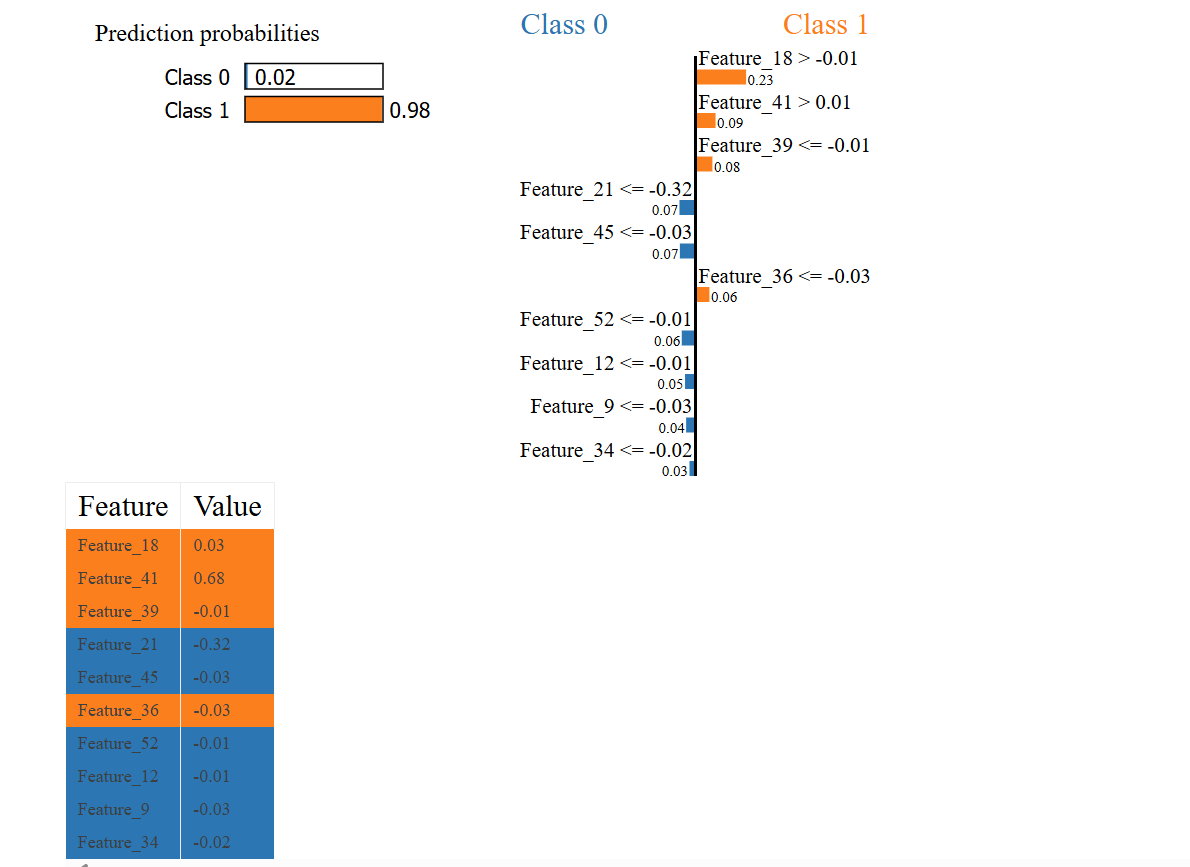